In [1]:
%load_ext autoreload
%autoreload 2
import torch
import imageio
import sys
import io
import matplotlib.pyplot as plt
sys.path.append("../radialmri/")
from simulation_and_reconstruction import *

In [2]:
device = torch.device('cuda')

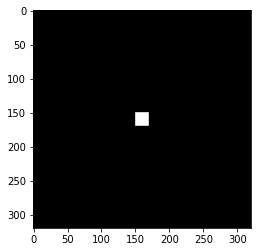

In [29]:
x, y, wx, wy, nt = 320, 320, 10, 10, 22
pt = torch.zeros((nt, 2, 320, 320), device = device)
pt[:, :, x // 2 - wx : x // 2 + wx , y // 2 - wy : y // 2 + wy] = 1
plt.imshow(pt[0, 0].cpu(), cmap = 'gray')
plt.show()

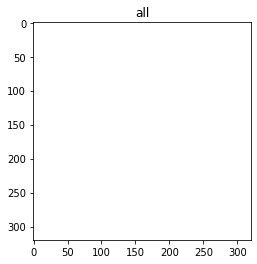

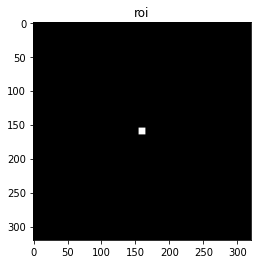

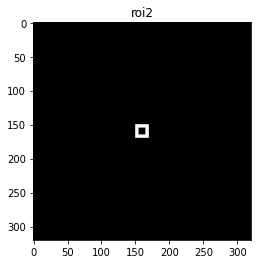

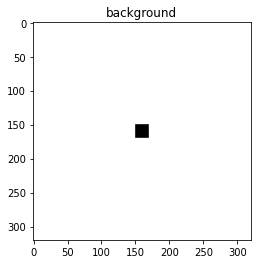

In [30]:
#introduce a linear temporal variation
for i in range(nt):
    pt[i] *= (i + 1)
    
maskdict = {'all' : np.ones((x, y))}

maskdict['roi'] = np.zeros((x, y))
maskdict['roi'][x // 2 - wx // 2 : x // 2 + wx // 2, y // 2 - wy // 2 : y // 2 + wy // 2] = 1

maskdict['roi2'] = np.zeros((x, y))
maskdict['roi2'][x // 2 - wx : x // 2 + wx, y // 2 - wy : y // 2 + wy] = 1
maskdict['roi2'] -= maskdict['roi']

maskdict['background'] = maskdict['all'] - maskdict['roi'] - maskdict['roi2']

for k, v in maskdict.items():
    plt.imshow(v, vmin = 0, vmax = 1)
    plt.title(k)
    plt.show()

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


torch.Size([22, 1, 2, 8320])
torch.Size([22, 1, 2, 8320])
torch.Size([22, 2, 320, 320])


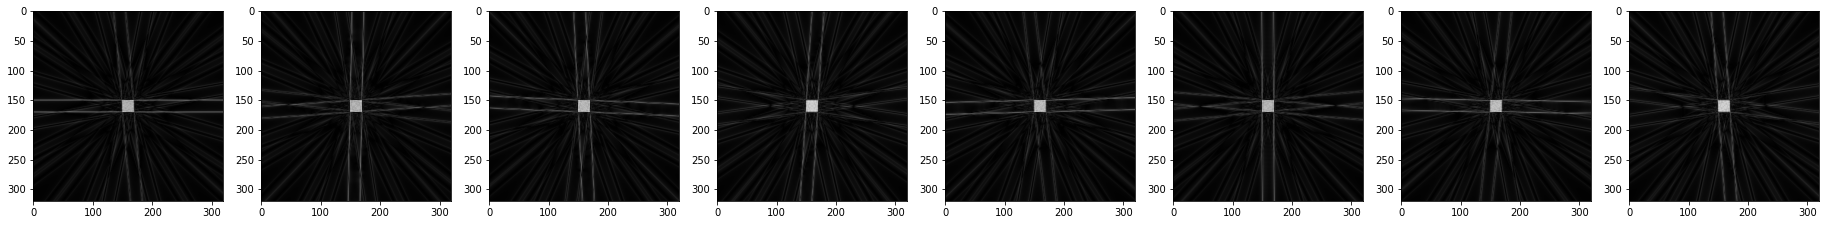

In [31]:
kspace, recon, traj, dcomp = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 13, nt= 22, nc = 1, spokelength= 640, 
                                                 smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device), 
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon[:, 0]**2 + recon[:, 1]**2).cpu(), n = 8)

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


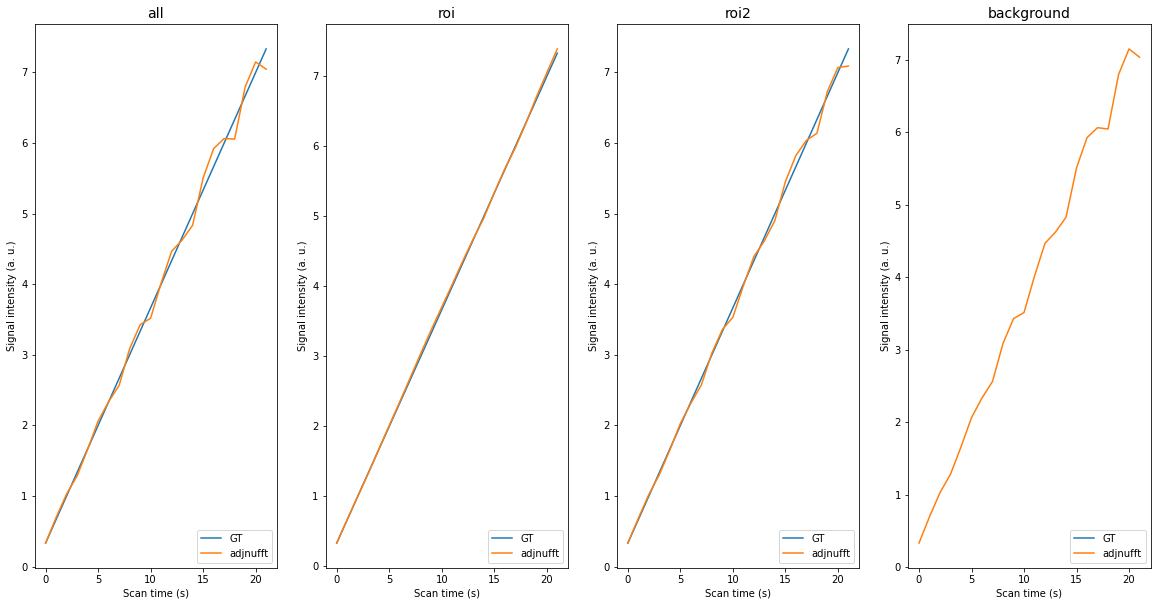

In [34]:
plotcurves(x_hat = recon.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

In [ ]:
#smaller ROI, 13 spokes

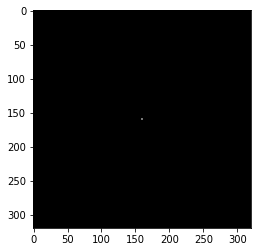

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([22, 1, 2, 8320])
torch.Size([22, 1, 2, 8320])
torch.Size([22, 2, 320, 320])


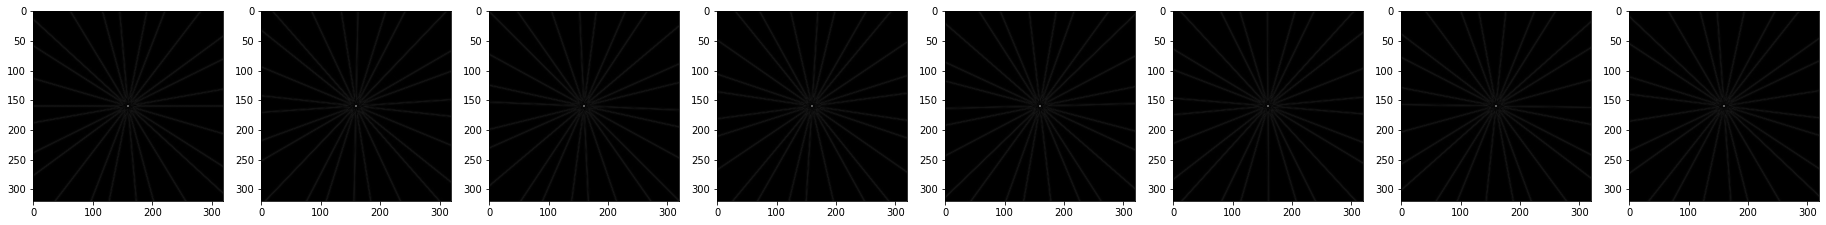

../radialmri/simulation_and_reconstruction.py:282: RuntimeWarning: invalid value encountered in double_scalars
  /mask[2].sum() for i in range(nt)]))
../radialmri/simulation_and_reconstruction.py:284: RuntimeWarning: invalid value encountered in double_scalars
  /mask[2].sum() for i in range(nt)]))


(22,)


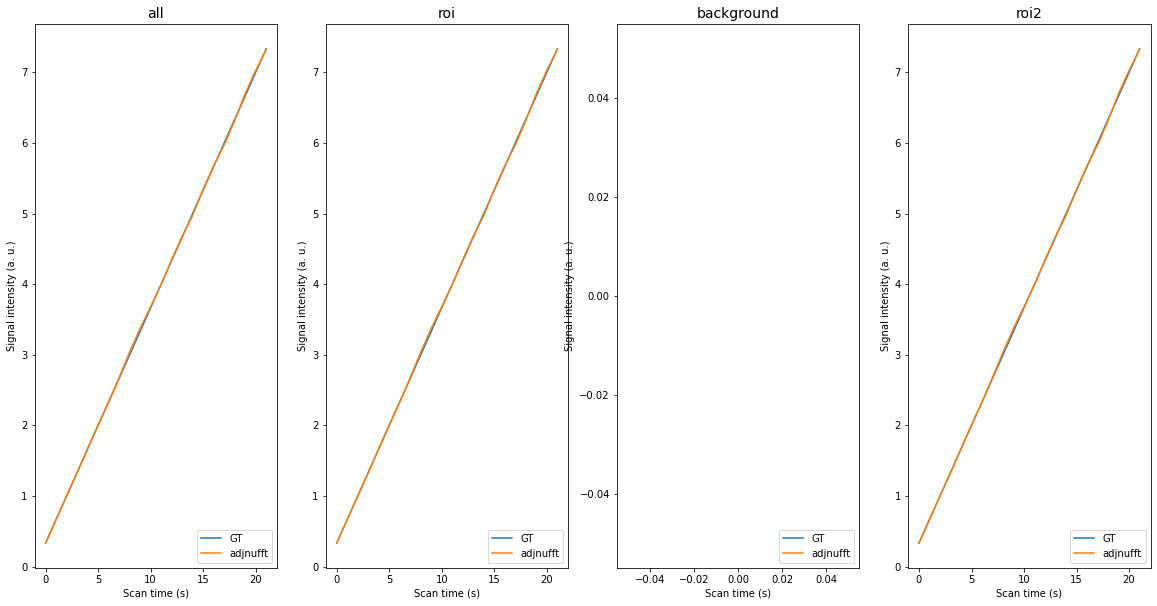

In [75]:
x, y, wx, wy, nt = 320, 320, 3, 3, 22
pt = torch.zeros((nt, 2, 320, 320), device = device)
pt[:, :, x // 2 - wx // 2 : x // 2 + wx // 2, y // 2 - wy // 2 : y // 2 + wy // 2] = 1
plt.imshow(pt[0, 0].cpu(), cmap = 'gray')
plt.show()

#introduce a linear temporal variation
for i in range(nt):
    pt[i] *= (i + 1)
    
maskdict = {'all' : np.ones((x, y))}

maskdict['roi'] = np.ones((x, y))
maskdict['roi'][x // 2 - wx // 2 : x // 2 + wx // 2, y // 2 - wy // 2 : y // 2 + wy // 2] = 1

maskdict['background'] = maskdict['all'] - maskdict['roi']
maskdict['roi2'] = np.ones((x, y))
maskdict['roi2'][x // 2 - wx : x // 2 + wx, y // 2 - wy : y // 2 + wy] = 1

kspace, recon, traj, dcomp = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 13, nt= 22, nc = 1, spokelength= 640, 
                                                 smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device), 
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon[:, 0]**2 + recon[:, 1]**2).cpu(), n = 8)

plotcurves(x_hat = recon.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

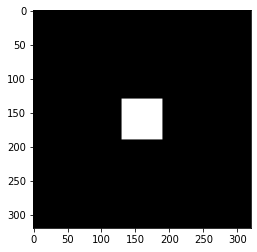

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([22, 1, 2, 13440])
torch.Size([22, 1, 2, 13440])
torch.Size([22, 2, 320, 320])


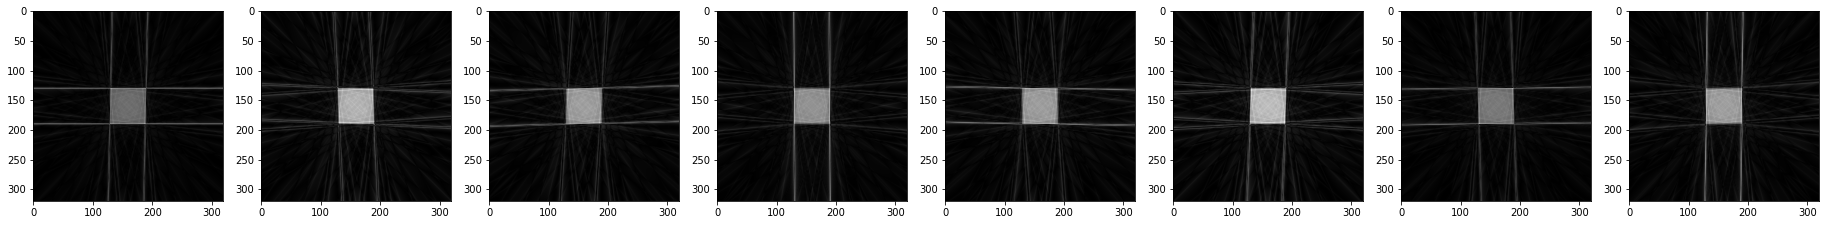

../radialmri/simulation_and_reconstruction.py:282: RuntimeWarning: invalid value encountered in double_scalars
  /mask[2].sum() for i in range(nt)]))
../radialmri/simulation_and_reconstruction.py:284: RuntimeWarning: invalid value encountered in double_scalars
  /mask[2].sum() for i in range(nt)]))


(22,)


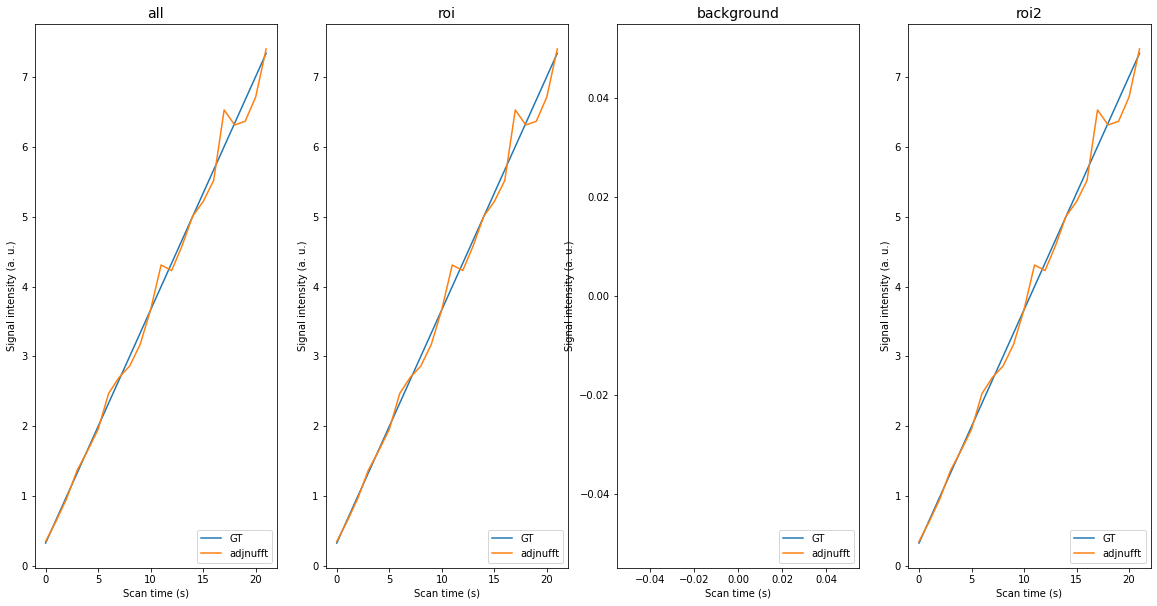

In [77]:
#Larger ROI
x, y, wx, wy, nt = 320, 320, 60, 60, 22
pt = torch.zeros((nt, 2, 320, 320), device = device)
pt[:, :, x // 2 - wx // 2 : x // 2 + wx // 2, y // 2 - wy // 2 : y // 2 + wy // 2] = 1
plt.imshow(pt[0, 0].cpu(), cmap = 'gray')
plt.show()

#introduce a linear temporal variation
for i in range(nt):
    pt[i] *= (i + 1)
    
maskdict = {'all' : np.ones((x, y))}

maskdict['roi'] = np.ones((x, y))
maskdict['roi'][x // 2 - wx // 2 : x // 2 + wx // 2, y // 2 - wy // 2 : y // 2 + wy // 2] = 1

maskdict['background'] = maskdict['all'] - maskdict['roi']
maskdict['roi2'] = np.ones((x, y))
maskdict['roi2'][x // 2 - wx : x // 2 + wx, y // 2 - wy : y // 2 + wy] = 1

kspace, recon, traj, dcomp = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 21, nt= 22, nc = 1, spokelength= 640, 
                                                 smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device), 
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon[:, 0]**2 + recon[:, 1]**2).cpu(), n = 8)

plotcurves(x_hat = recon.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# intruduce 2 regions, roi has learnlt increasing signal while roi2 has constant signal

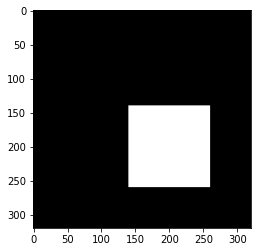

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([22, 1, 2, 13440])
torch.Size([22, 1, 2, 13440])
torch.Size([22, 2, 320, 320])


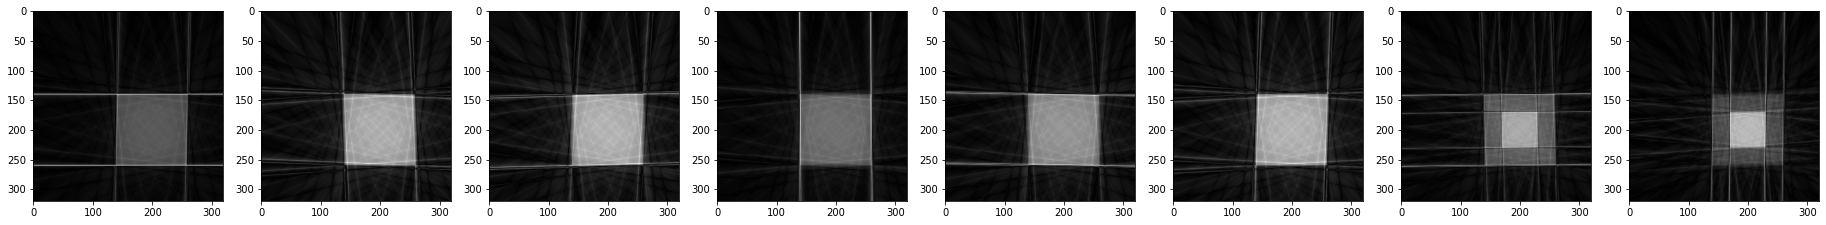

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


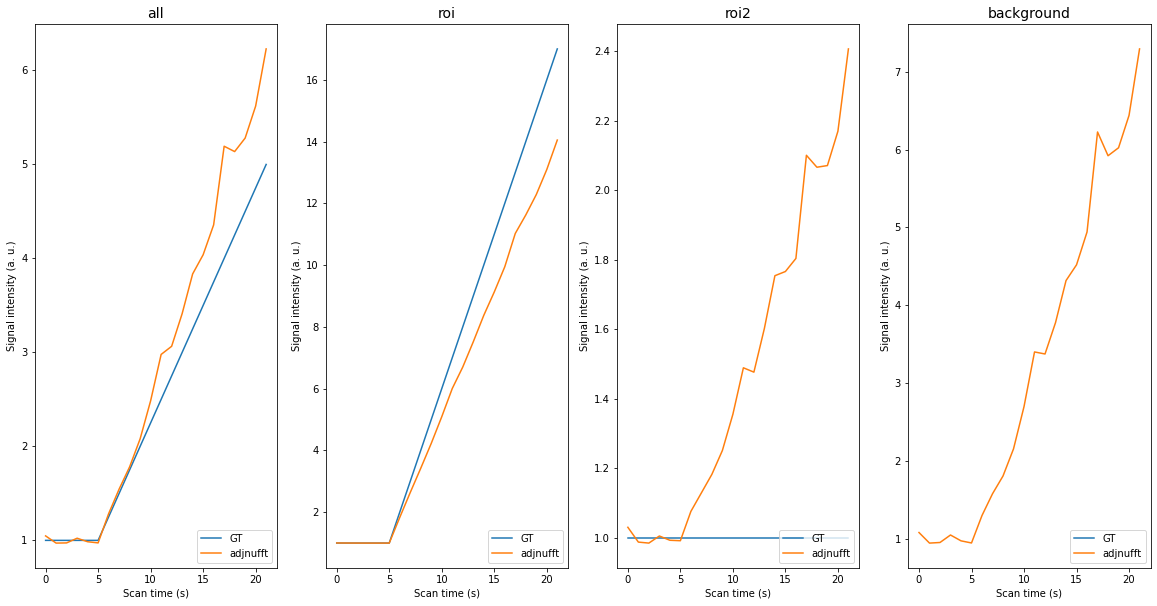

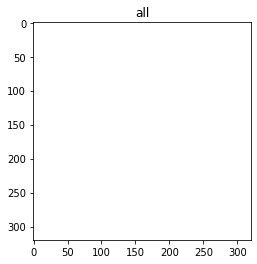

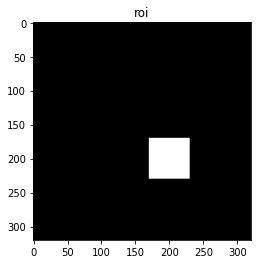

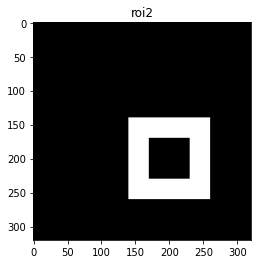

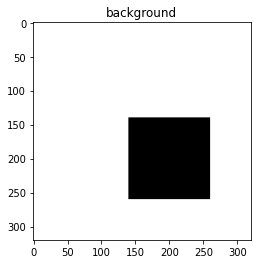

In [39]:
x, y, wx, wy, nt, x_shift, y_shift = 320, 320, 60, 60, 22, 40, 40
pt = torch.zeros((nt, 2, 320, 320), device = device)
pt[:, :, x_shift + x // 2 - wx : x_shift + x // 2 + wx, x_shift + y // 2 - wy : x_shift + y // 2 + wy] = 1
plt.imshow(pt[0, 0].cpu(), cmap = 'gray')
plt.show()

#introduce a linear temporal variation
for i in range(5, nt):
    pt[i, : , x_shift + x // 2 - wx // 2 : x_shift + x // 2 + wx // 2, y_shift + y // 2 - wy // 2: y_shift + y // 2 + wy // 2] *= (i - 4)

maskdict = {'all' : np.ones((x, y))}

maskdict['roi'] = np.zeros((x, y))
maskdict['roi'][x_shift + x // 2 - wx // 2 : x_shift + x // 2 + wx // 2, y_shift + y // 2 - wy // 2 : y_shift + y // 2 + wy // 2] = 1

maskdict['roi2'] = np.zeros((x, y))
maskdict['roi2'][x_shift + x // 2 - wx : x_shift + x // 2 + wx, y_shift + y // 2 - wy : y_shift + y // 2 + wy] = 1
maskdict['roi2'] -= maskdict['roi']

maskdict['background'] = maskdict['all'] - maskdict['roi'] - maskdict['roi2']


kspace, recon, traj, dcomp = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 21, nt= 22, nc = 1, spokelength= 640, 
                                                 smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device), 
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon[:, 0]**2 + recon[:, 1]**2).cpu(), n = 8)

plotcurves(x_hat = recon.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

for k, v in maskdict.items():
    plt.imshow(v, vmin = 0, vmax = 1)
    plt.title(k)
    plt.show()

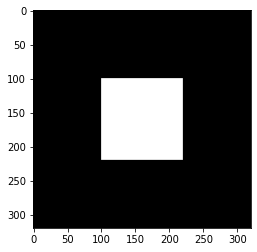

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


torch.Size([22, 1, 2, 13440])
torch.Size([22, 1, 2, 13440])
torch.Size([22, 2, 320, 320])


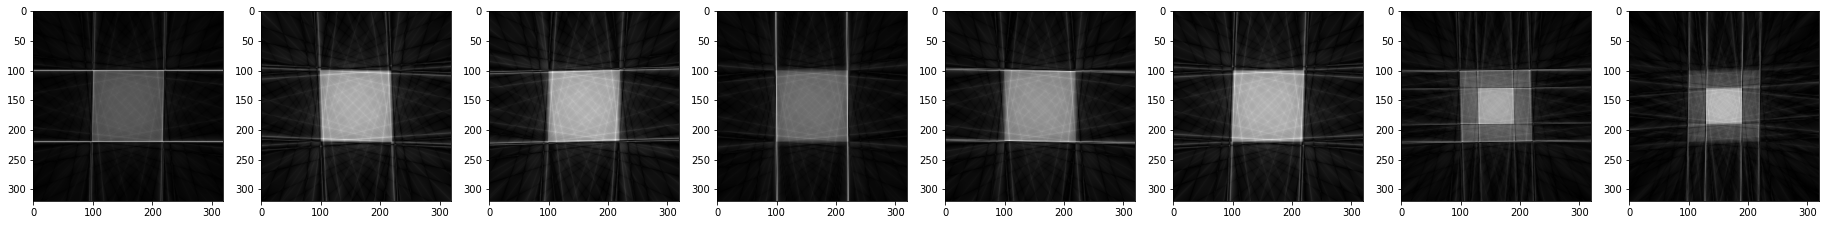

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


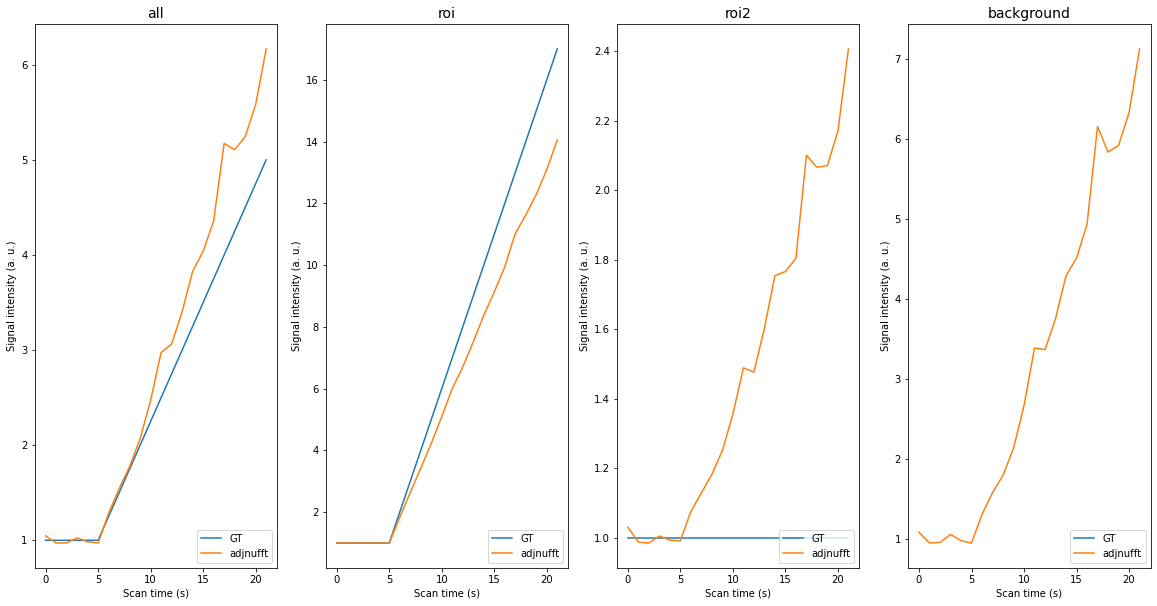

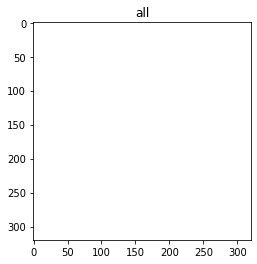

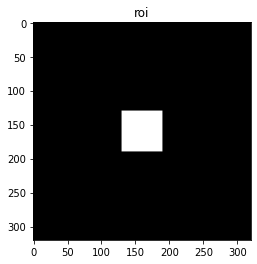

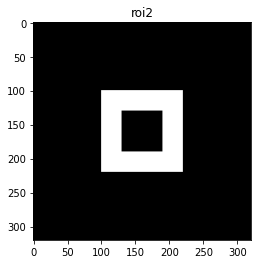

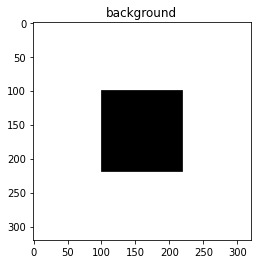

In [40]:
x, y, wx, wy, nt, x_shift, y_shift = 320, 320, 60, 60, 22, 0, 0
pt = torch.zeros((nt, 2, 320, 320), device = device)
pt[:, :, x_shift + x // 2 - wx : x_shift + x // 2 + wx, x_shift + y // 2 - wy : x_shift + y // 2 + wy] = 1
plt.imshow(pt[0, 0].cpu(), cmap = 'gray')
plt.show()

#introduce a linear temporal variation
for i in range(5, nt):
    pt[i, : , x_shift + x // 2 - wx // 2 : x_shift + x // 2 + wx // 2, y_shift + y // 2 - wy // 2: y_shift + y // 2 + wy // 2] *= (i - 4)

maskdict = {'all' : np.ones((x, y))}

maskdict['roi'] = np.zeros((x, y))
maskdict['roi'][x_shift + x // 2 - wx // 2 : x_shift + x // 2 + wx // 2, y_shift + y // 2 - wy // 2 : y_shift + y // 2 + wy // 2] = 1

maskdict['roi2'] = np.zeros((x, y))
maskdict['roi2'][x_shift + x // 2 - wx : x_shift + x // 2 + wx, y_shift + y // 2 - wy : y_shift + y // 2 + wy] = 1
maskdict['roi2'] -= maskdict['roi']

maskdict['background'] = maskdict['all'] - maskdict['roi'] - maskdict['roi2']


kspace, recon, traj, dcomp = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 21, nt= 22, nc = 1, spokelength= 640, 
                                                 smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device), 
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon[:, 0]**2 + recon[:, 1]**2).cpu(), n = 8)

plotcurves(x_hat = recon.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

for k, v in maskdict.items():
    plt.imshow(v, vmin = 0, vmax = 1)
    plt.title(k)
    plt.show()

# CG2 with no density compensation, 12 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(0.1230, device='cuda:0')
0 Residual l2 norm =27469754.000000
1 tensor(0.2375, device='cuda:0')
1 Residual l2 norm =18928192.000000
2 tensor(0.1280, device='cuda:0')
2 Residual l2 norm =4382958.000000
3 tensor(0.2558, device='cuda:0')
3 Residual l2 norm =4230065.000000
4 tensor(0.1321, device='cuda:0')
4 Residual l2 norm =1189124.250000
5 tensor(0.2665, device='cuda:0')
5 Residual l2 norm =1387450.500000
6 tensor(0.1342, device='cuda:0')
6 Residual l2 norm =427581.718750
7 tensor(0.2733, device='cuda:0')
7 Residual l2 norm =553793.312500
8 tensor(0.1358, device='cuda:0')
8 Residual l2 norm =182329.046875
9 tensor(0.2788, device='cuda:0')
9 Residual l2 norm =255802.687500
10 tensor(0.1372, device='cuda:0')
10 Residual l2 norm =88810.617188
11 tensor(0.2832, device='cuda:0')
11 Residual l2 norm =132513.015625


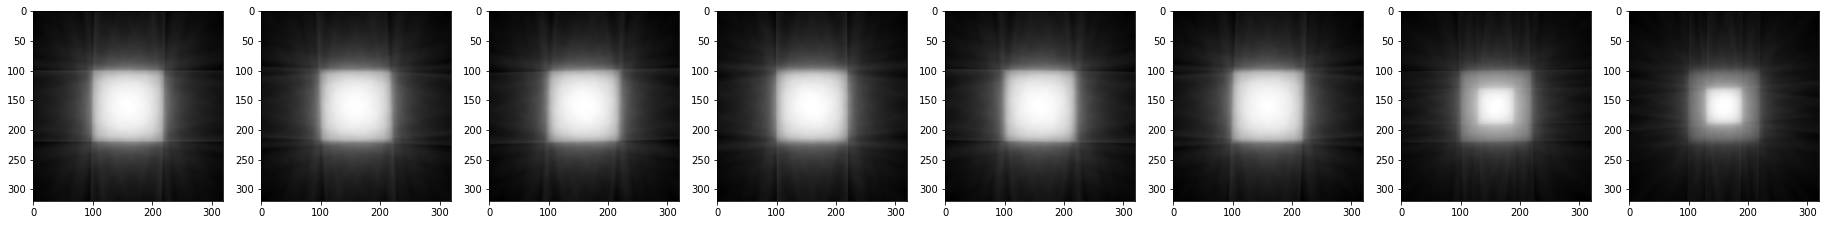

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


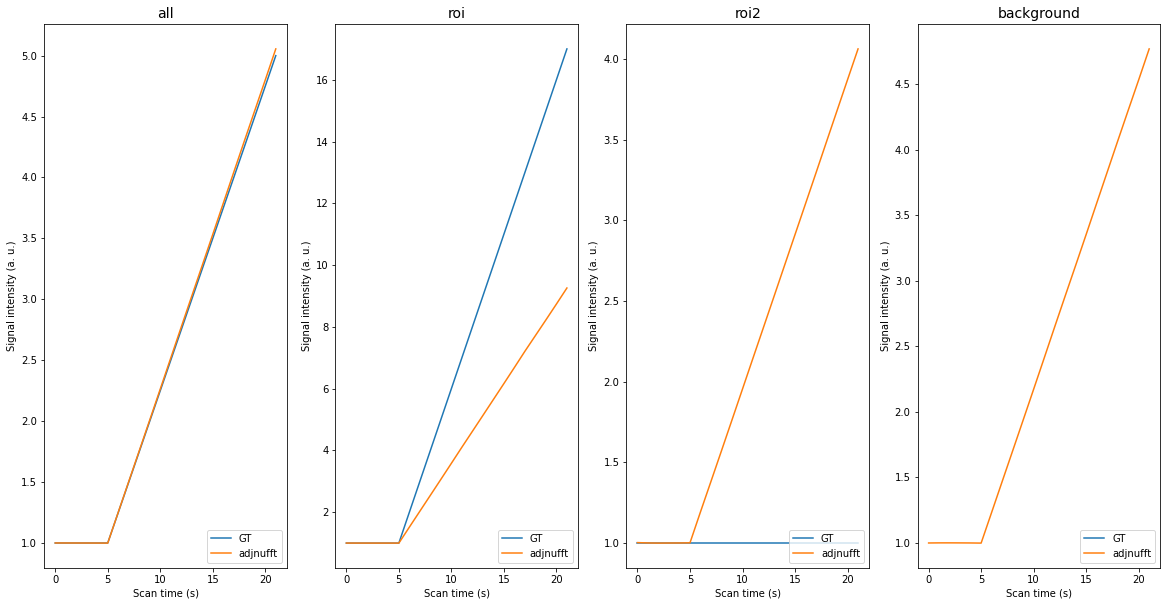

In [41]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            w = dcomp_trivial.to(device), 
            #w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 12,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG2 with no density compensation, 32 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(0.1230, device='cuda:0')
0 Residual l2 norm =27469754.000000
1 tensor(0.2375, device='cuda:0')
1 Residual l2 norm =18928188.000000
2 tensor(0.1280, device='cuda:0')
2 Residual l2 norm =4382959.000000
3 tensor(0.2558, device='cuda:0')
3 Residual l2 norm =4230066.000000
4 tensor(0.1321, device='cuda:0')
4 Residual l2 norm =1189123.375000
5 tensor(0.2665, device='cuda:0')
5 Residual l2 norm =1387451.000000
6 tensor(0.1342, device='cuda:0')
6 Residual l2 norm =427581.156250
7 tensor(0.2733, device='cuda:0')
7 Residual l2 norm =553793.312500
8 tensor(0.1358, device='cuda:0')
8 Residual l2 norm =182328.812500
9 tensor(0.2788, device='cuda:0')
9 Residual l2 norm =255802.609375
10 tensor(0.1372, device='cuda:0')
10 Residual l2 norm =88810.476562
11 tensor(0.2832, device='cuda:0')
11 Residual l2 norm =132513.000000
12 tensor(0.1384, device='cuda:0')
12 Residual l2 norm =47937.765625
13 tensor(0.2862, device='cuda:0')
13 Residual 

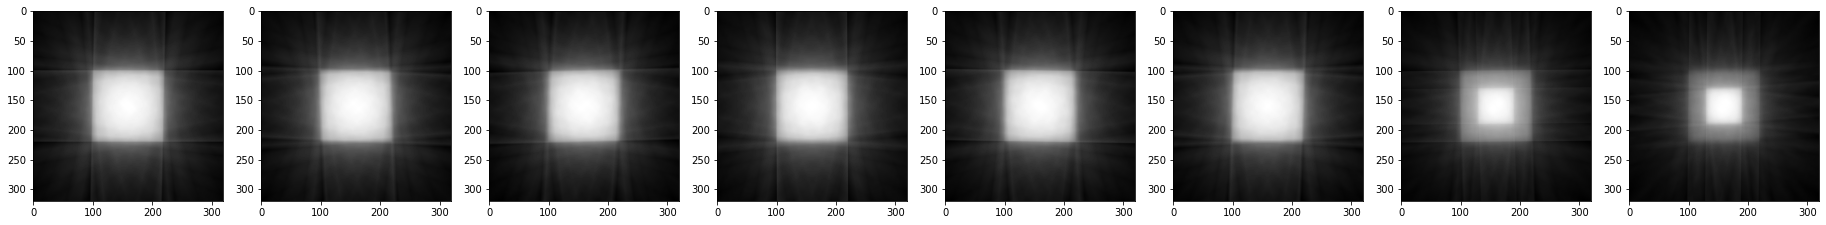

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


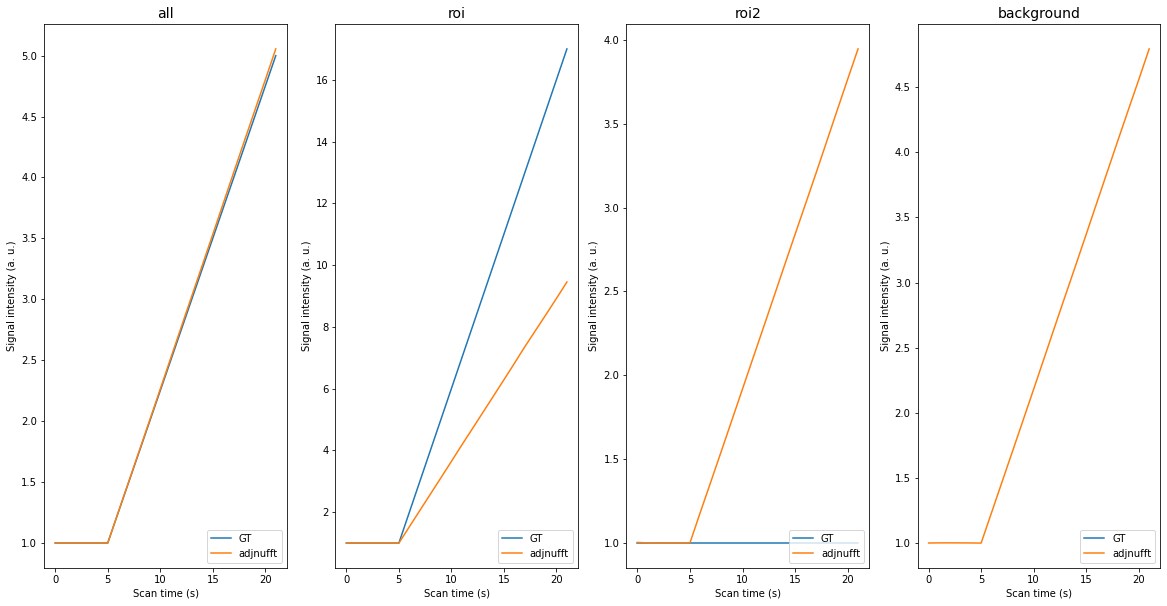

In [42]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            w = dcomp_trivial.to(device), 
            #w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

In [46]:
# CG2 with no density compensation, 64 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(0.1230, device='cuda:0')
0 Residual l2 norm =27469760.000000
1 tensor(0.2375, device='cuda:0')
1 Residual l2 norm =18928198.000000
2 tensor(0.1280, device='cuda:0')
2 Residual l2 norm =4382960.000000
3 tensor(0.2558, device='cuda:0')
3 Residual l2 norm =4230064.000000
4 tensor(0.1321, device='cuda:0')
4 Residual l2 norm =1189124.750000
5 tensor(0.2665, device='cuda:0')
5 Residual l2 norm =1387451.000000
6 tensor(0.1342, device='cuda:0')
6 Residual l2 norm =427581.968750
7 tensor(0.2733, device='cuda:0')
7 Residual l2 norm =553793.500000
8 tensor(0.1358, device='cuda:0')
8 Residual l2 norm =182329.156250
9 tensor(0.2788, device='cuda:0')
9 Residual l2 norm =255802.750000
10 tensor(0.1372, device='cuda:0')
10 Residual l2 norm =88810.671875
11 tensor(0.2832, device='cuda:0')
11 Residual l2 norm =132513.078125
12 tensor(0.1384, device='cuda:0')
12 Residual l2 norm =47937.878906
13 tensor(0.2862, device='cuda:0')
13 Residual 

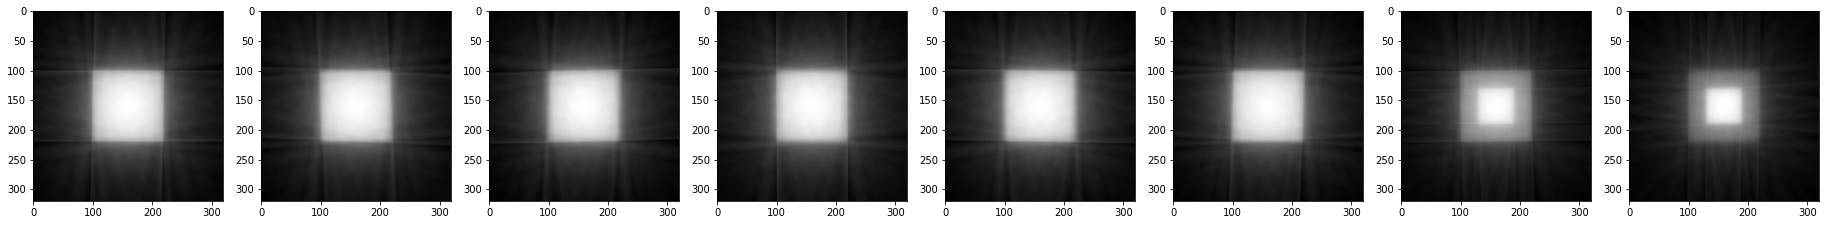

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


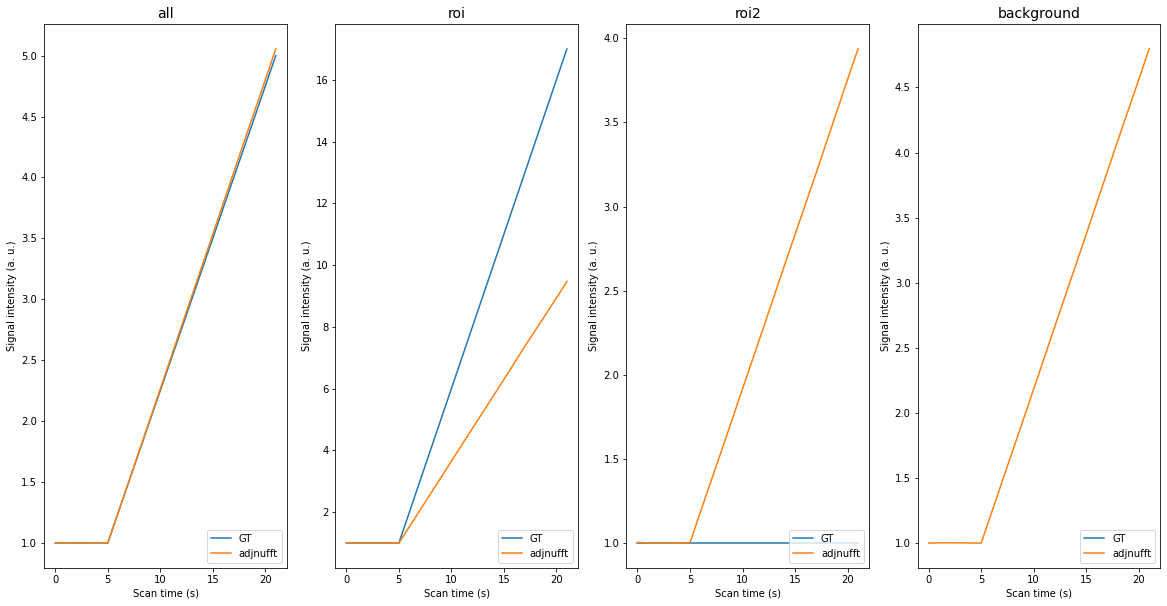

In [45]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            w = dcomp_trivial.to(device), 
            #w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 64,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG2 with density compensation, 12 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(14.8294, device='cuda:0')
0 Residual l2 norm =24260.576172
1 tensor(2.9192, device='cuda:0')
1 Residual l2 norm =4384.100586
2 tensor(5.4806, device='cuda:0')
2 Residual l2 norm =5284.949219
3 tensor(3.1999, device='cuda:0')
3 Residual l2 norm =2501.578857
4 tensor(5.0001, device='cuda:0')
4 Residual l2 norm =3223.260010
5 tensor(3.0279, device='cuda:0')
5 Residual l2 norm =1666.584106
6 tensor(4.2289, device='cuda:0')
6 Residual l2 norm =2061.298340
7 tensor(2.7334, device='cuda:0')
7 Residual l2 norm =1171.526245
8 tensor(3.7279, device='cuda:0')
8 Residual l2 norm =1380.491089
9 tensor(2.6692, device='cuda:0')
9 Residual l2 norm =842.282654
10 tensor(3.6220, device='cuda:0')
10 Residual l2 norm =971.610413
11 tensor(2.6842, device='cuda:0')
11 Residual l2 norm =610.645447


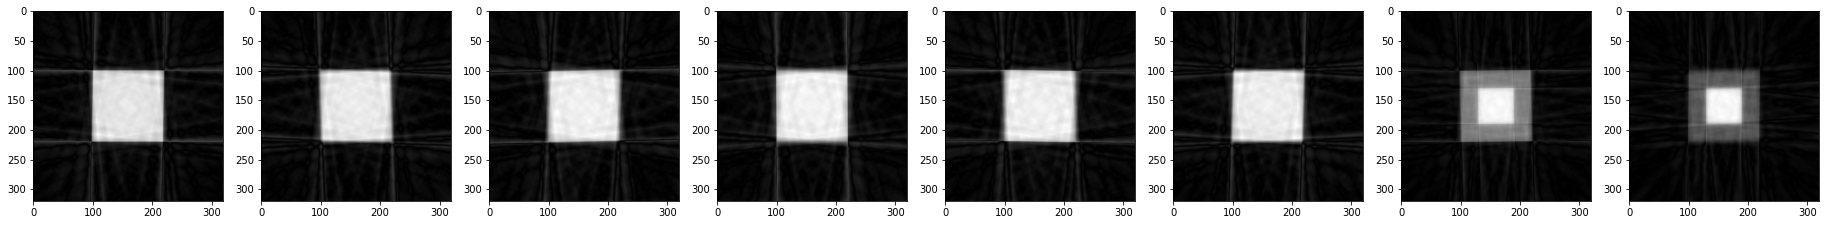

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


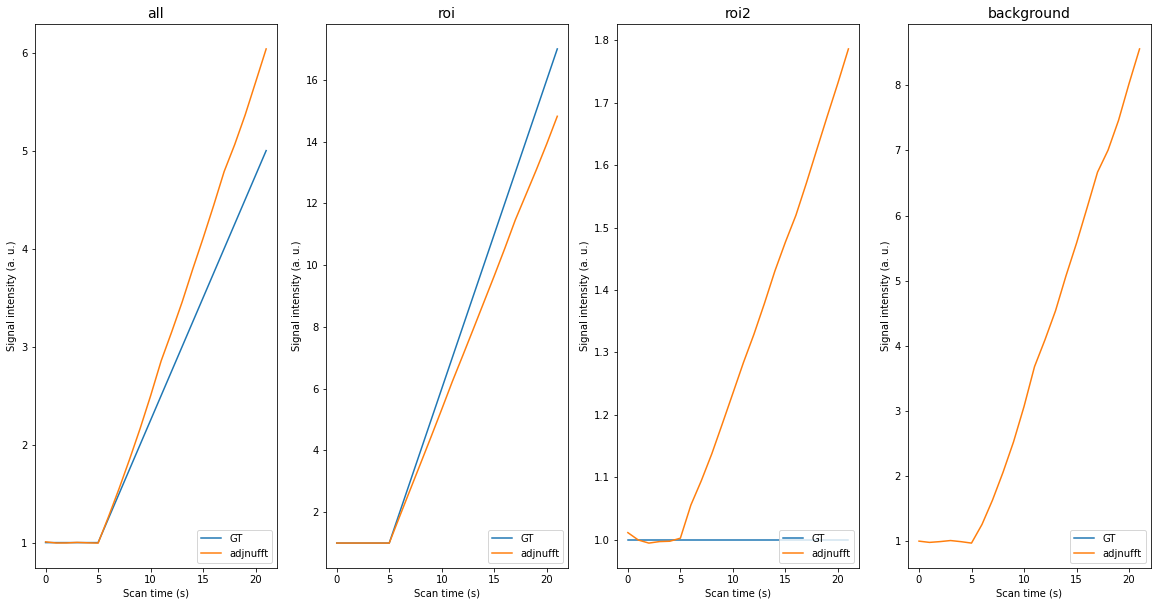

In [47]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 12,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG2 with density compensation, 20 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(14.8294, device='cuda:0')
0 Residual l2 norm =24260.576172
1 tensor(2.9192, device='cuda:0')
1 Residual l2 norm =4384.100586
2 tensor(5.4806, device='cuda:0')
2 Residual l2 norm =5284.949219
3 tensor(3.1999, device='cuda:0')
3 Residual l2 norm =2501.578857
4 tensor(5.0001, device='cuda:0')
4 Residual l2 norm =3223.259277
5 tensor(3.0279, device='cuda:0')
5 Residual l2 norm =1666.585693
6 tensor(4.2289, device='cuda:0')
6 Residual l2 norm =2061.297363
7 tensor(2.7334, device='cuda:0')
7 Residual l2 norm =1171.527344
8 tensor(3.7279, device='cuda:0')
8 Residual l2 norm =1380.489990
9 tensor(2.6692, device='cuda:0')
9 Residual l2 norm =842.283325
10 tensor(3.6220, device='cuda:0')
10 Residual l2 norm =971.609680
11 tensor(2.6842, device='cuda:0')
11 Residual l2 norm =610.646057
12 tensor(3.5709, device='cuda:0')
12 Residual l2 norm =689.705139
13 tensor(2.7180, device='cuda:0')
13 Residual l2 norm =445.223297
14 tensor(3.52

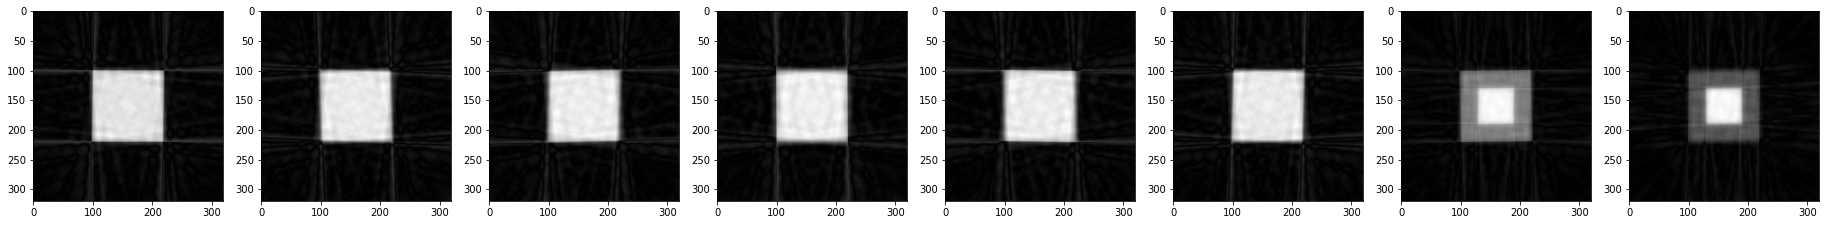

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


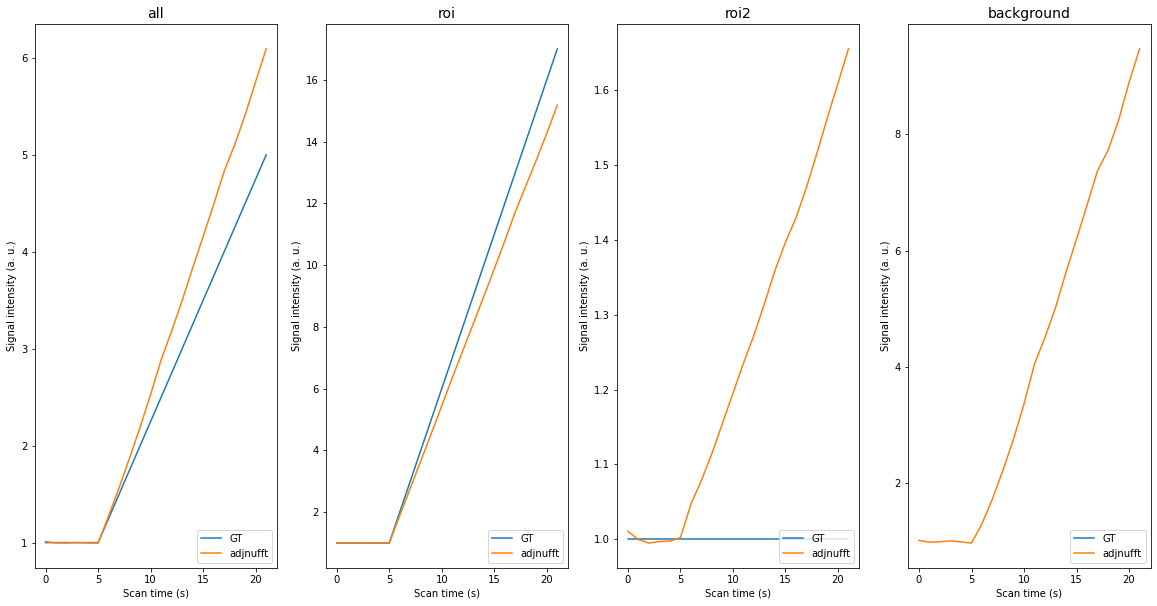

In [48]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 20,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG2 with density compensation, 32 iterations

coil_sensitivities.shape torch.Size([1, 1, 2, 320, 320])
0 tensor(14.8588, device='cuda:0')
0 Residual l2 norm =24304.945312
1 tensor(2.9199, device='cuda:0')
1 Residual l2 norm =4368.497559
2 tensor(5.4983, device='cuda:0')
2 Residual l2 norm =5258.828125
3 tensor(3.2134, device='cuda:0')
3 Residual l2 norm =2477.882324
4 tensor(5.0737, device='cuda:0')
4 Residual l2 norm =3189.392822
5 tensor(3.0828, device='cuda:0')
5 Residual l2 norm =1628.353271
6 tensor(4.3970, device='cuda:0')
6 Residual l2 norm =2036.156860
7 tensor(2.7875, device='cuda:0')
7 Residual l2 norm =1139.747314
8 tensor(3.7735, device='cuda:0')
8 Residual l2 norm =1344.286499
9 tensor(2.6866, device='cuda:0')
9 Residual l2 norm =818.999207
10 tensor(3.6249, device='cuda:0')
10 Residual l2 norm =941.848389
11 tensor(2.6986, device='cuda:0')
11 Residual l2 norm =595.869690
12 tensor(3.5559, device='cuda:0')
12 Residual l2 norm =668.419861
13 tensor(2.7359, device='cuda:0')
13 Residual l2 norm =437.556396
14 tensor(3.49

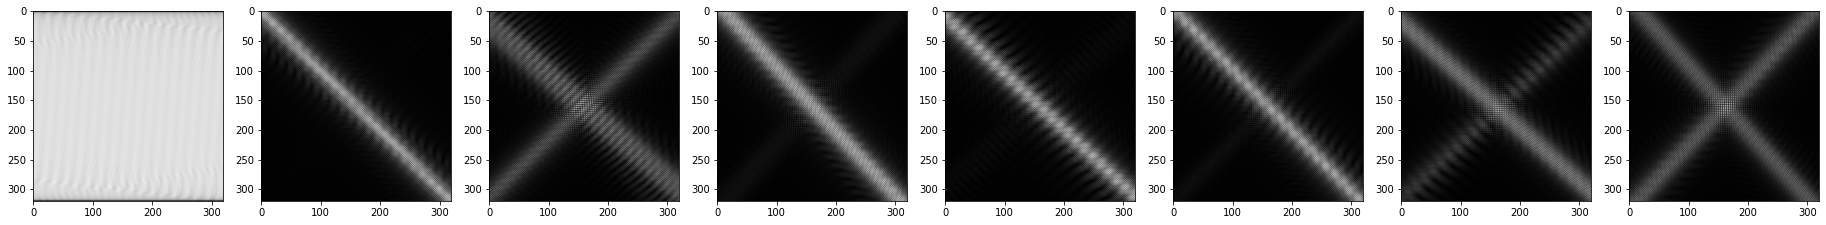

(22,)


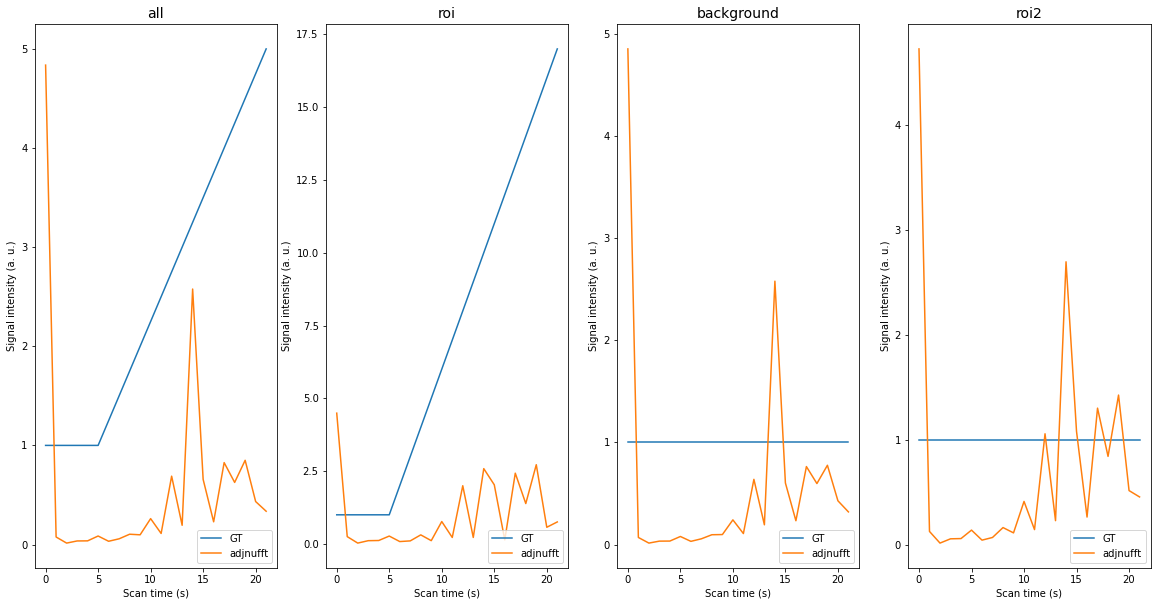

In [116]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG2')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))

plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG5

0 alpha:  tensor([ 1.4803e+01, -2.6526e-07], device='cuda:0')
1 alpha:  tensor([ 4.8930e+00, -1.1762e-07], device='cuda:0')
2 alpha:  tensor([ 4.6826e+00, -2.4058e-08], device='cuda:0')
3 alpha:  tensor([ 5.1269e+00, -7.4114e-08], device='cuda:0')
4 alpha:  tensor([ 4.7299e+00, -8.3464e-09], device='cuda:0')
5 alpha:  tensor([ 4.0533e+00, -1.5765e-08], device='cuda:0')
6 alpha:  tensor([ 4.3630e+00, -5.0370e-08], device='cuda:0')
7 alpha:  tensor([ 4.3121e+00, -2.1136e-08], device='cuda:0')
8 alpha:  tensor([ 3.9899e+00, -4.6466e-08], device='cuda:0')
9 alpha:  tensor([ 4.3316e+00, -4.3703e-08], device='cuda:0')
10 alpha:  tensor([ 4.9342e+00, -4.7675e-08], device='cuda:0')
11 alpha:  tensor([ 5.0220e+00, -1.4574e-08], device='cuda:0')


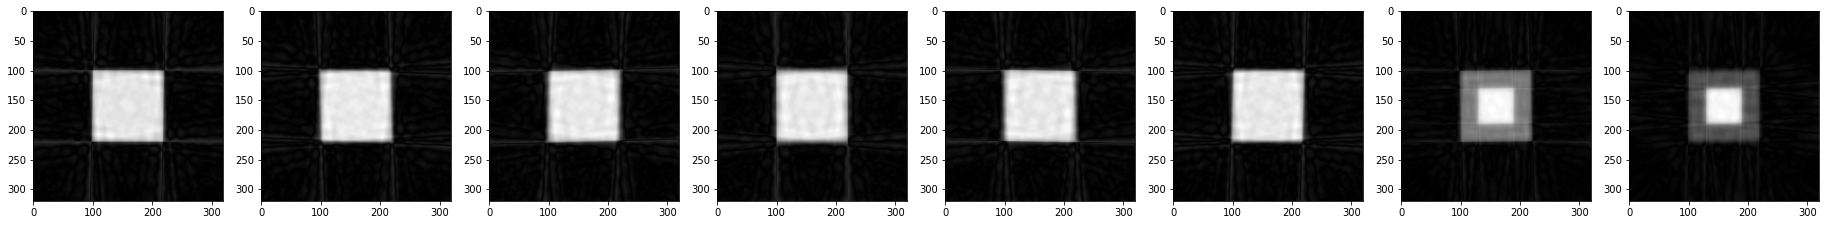

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


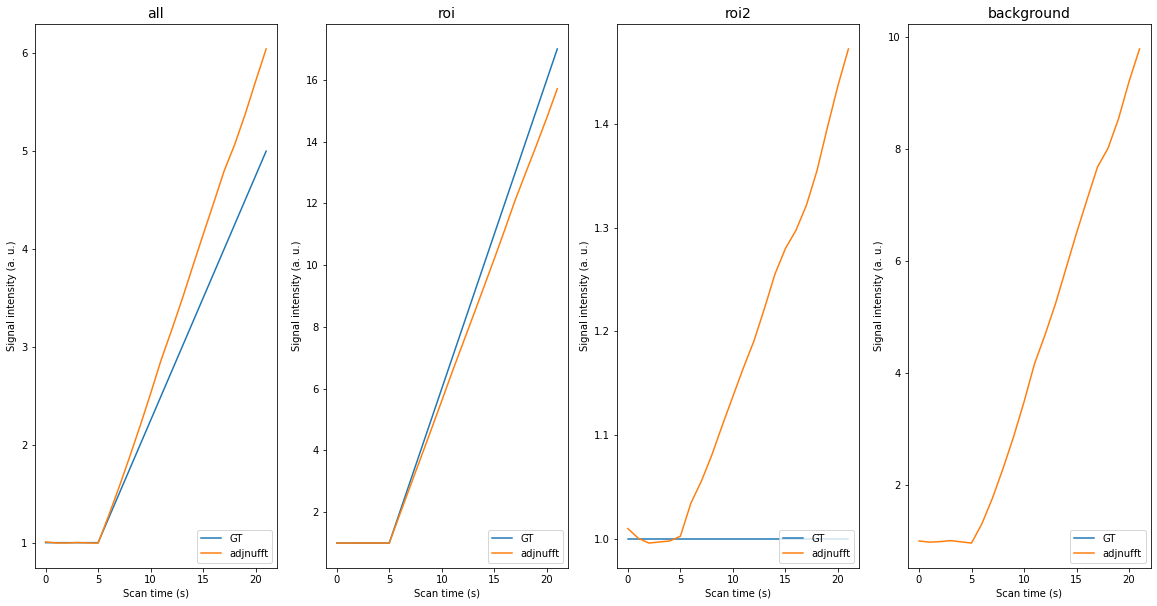

In [49]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            w = dcomp.to(device), 
            #w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 12,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

0 alpha:  tensor([ 1.4803e+01, -2.5101e-07], device='cuda:0')
1 alpha:  tensor([ 4.8930e+00, -1.0995e-07], device='cuda:0')
2 alpha:  tensor([ 4.6826e+00, -2.1176e-08], device='cuda:0')
3 alpha:  tensor([ 5.1269e+00, -7.0564e-08], device='cuda:0')
4 alpha:  tensor([ 4.7299e+00, -1.3623e-08], device='cuda:0')
5 alpha:  tensor([ 4.0533e+00, -9.2805e-09], device='cuda:0')
6 alpha:  tensor([ 4.3630e+00, -4.9174e-08], device='cuda:0')
7 alpha:  tensor([ 4.3121e+00, -2.1830e-08], device='cuda:0')
8 alpha:  tensor([ 3.9899e+00, -5.3015e-08], device='cuda:0')
9 alpha:  tensor([ 4.3316e+00, -4.7248e-08], device='cuda:0')
10 alpha:  tensor([ 4.9342e+00, -5.2500e-08], device='cuda:0')
11 alpha:  tensor([ 5.0220e+00, -1.5423e-08], device='cuda:0')
12 alpha:  tensor([ 4.7807e+00, -4.8450e-08], device='cuda:0')
13 alpha:  tensor([ 4.0293e+00, -5.4842e-08], device='cuda:0')
14 alpha:  tensor([ 3.3935e+00, -4.1232e-08], device='cuda:0')
15 alpha:  tensor([ 3.9058e+00, -4.1591e-08], device='cuda:0')
16

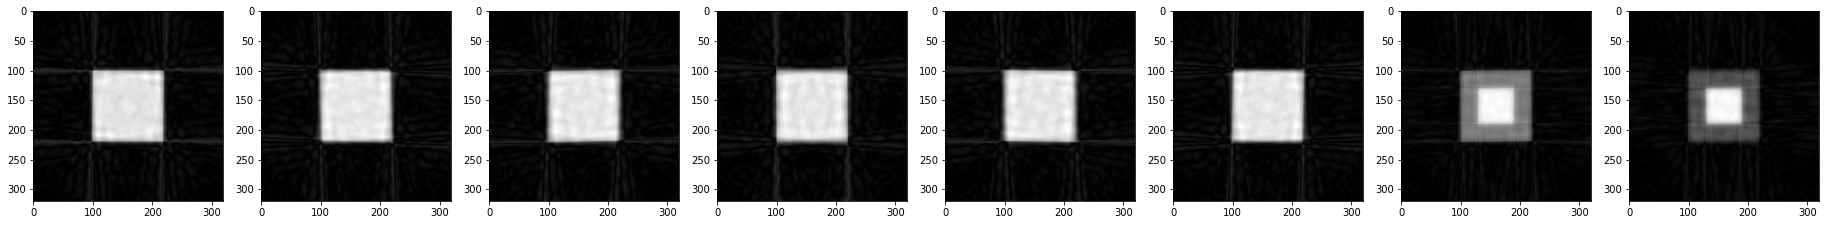

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


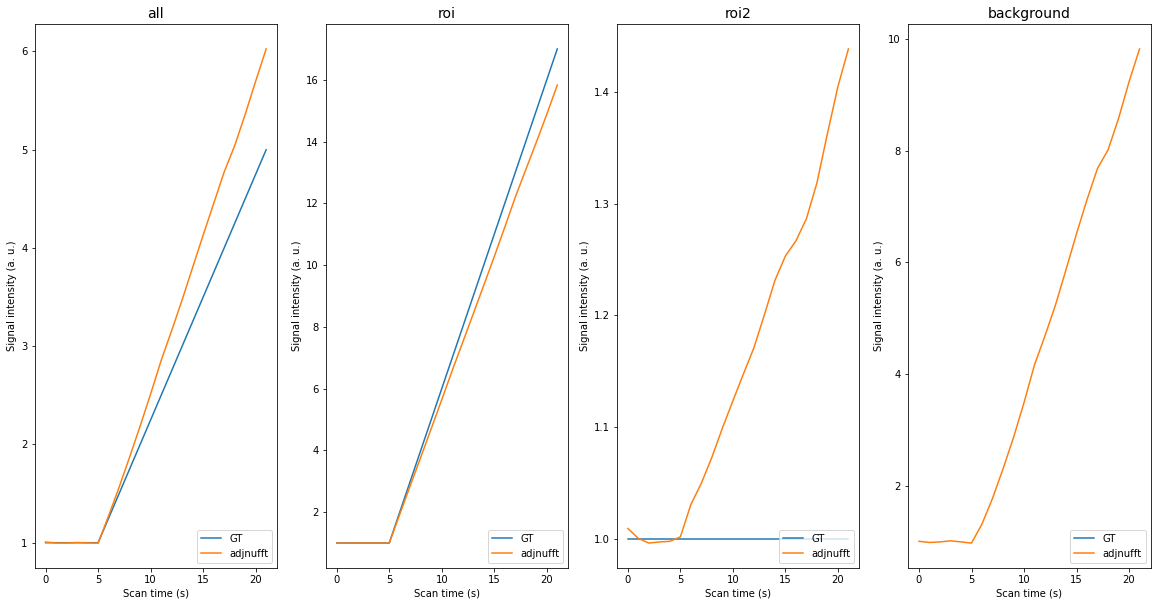

In [50]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            w = dcomp.to(device), 
            #w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

# CG5 no density compensation

0 alpha:  tensor([ 1.2297e-01, -2.4195e-09], device='cuda:0')
1 alpha:  tensor([ 3.5932e-01, -5.4407e-09], device='cuda:0')
2 alpha:  tensor([ 6.4819e-01, -3.2534e-08], device='cuda:0')
3 alpha:  tensor([ 8.3621e-01, -1.4802e-08], device='cuda:0')
4 alpha:  tensor([ 1.3689e-01, -2.2735e-09], device='cuda:0')
5 alpha:  tensor([ 8.7140e-01, -2.3762e-08], device='cuda:0')
6 alpha:  tensor([ 6.8816e-01, -2.5035e-08], device='cuda:0')
7 alpha:  tensor([ 6.7225e-01, -2.2713e-08], device='cuda:0')
8 alpha:  tensor([ 1.6883e-01, -3.9234e-09], device='cuda:0')
9 alpha:  tensor([ 7.0619e-01, -2.0612e-08], device='cuda:0')
10 alpha:  tensor([ 6.3775e-01, -1.1706e-08], device='cuda:0')
11 alpha:  tensor([ 1.1357e+00, -2.2466e-08], device='cuda:0')
12 alpha:  tensor([ 3.5302e-01, -7.9921e-09], device='cuda:0')
13 alpha:  tensor([ 4.6489e-01, -1.0822e-08], device='cuda:0')
14 alpha:  tensor([ 8.2142e-01, -1.2038e-08], device='cuda:0')
15 alpha:  tensor([ 1.3503e+00, -3.6594e-08], device='cuda:0')
16

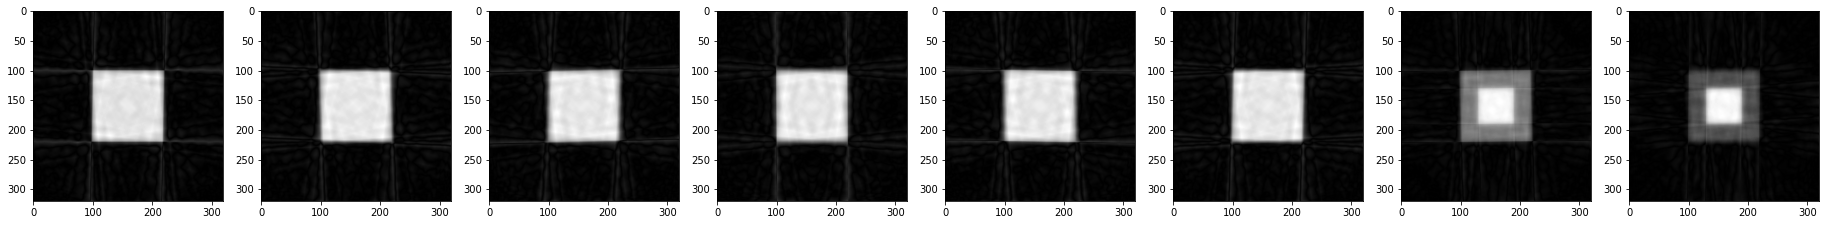

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


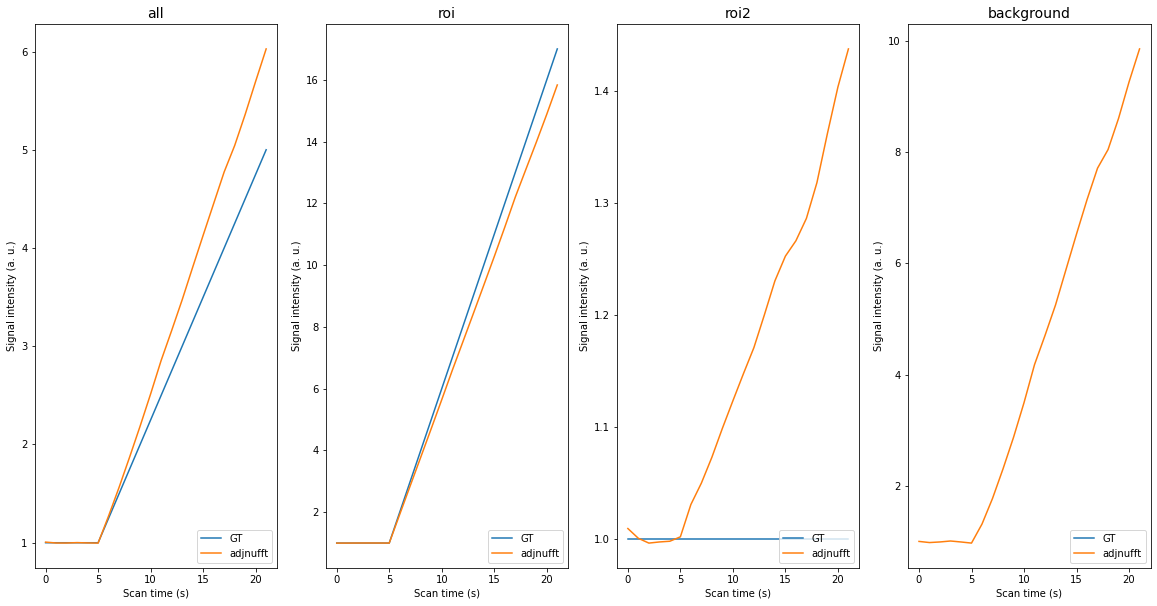

In [51]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp.to(device), 
            w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

0 alpha:  tensor([ 1.2297e-01, -2.7665e-09], device='cuda:0')
1 alpha:  tensor([ 3.5932e-01, -5.0189e-09], device='cuda:0')
2 alpha:  tensor([ 6.4819e-01, -3.1942e-08], device='cuda:0')
3 alpha:  tensor([ 8.3621e-01, -1.4876e-08], device='cuda:0')
4 alpha:  tensor([ 1.3689e-01, -3.0655e-09], device='cuda:0')
5 alpha:  tensor([ 8.7139e-01, -2.3748e-08], device='cuda:0')
6 alpha:  tensor([ 6.8816e-01, -2.5238e-08], device='cuda:0')
7 alpha:  tensor([ 6.7224e-01, -2.2734e-08], device='cuda:0')
8 alpha:  tensor([ 1.6882e-01, -3.8629e-09], device='cuda:0')
9 alpha:  tensor([ 7.0624e-01, -2.2287e-08], device='cuda:0')
10 alpha:  tensor([ 6.3775e-01, -1.3492e-08], device='cuda:0')
11 alpha:  tensor([ 1.1356e+00, -2.4503e-08], device='cuda:0')
12 alpha:  tensor([ 3.5304e-01, -8.4940e-09], device='cuda:0')
13 alpha:  tensor([ 4.6484e-01, -1.1571e-08], device='cuda:0')
14 alpha:  tensor([ 8.2092e-01, -1.2745e-08], device='cuda:0')
15 alpha:  tensor([ 1.3441e+00, -3.6644e-08], device='cuda:0')
16

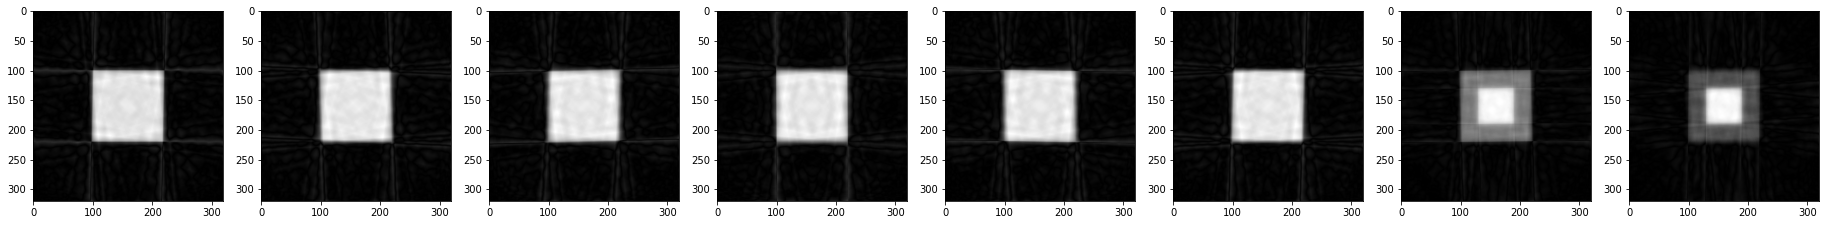

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


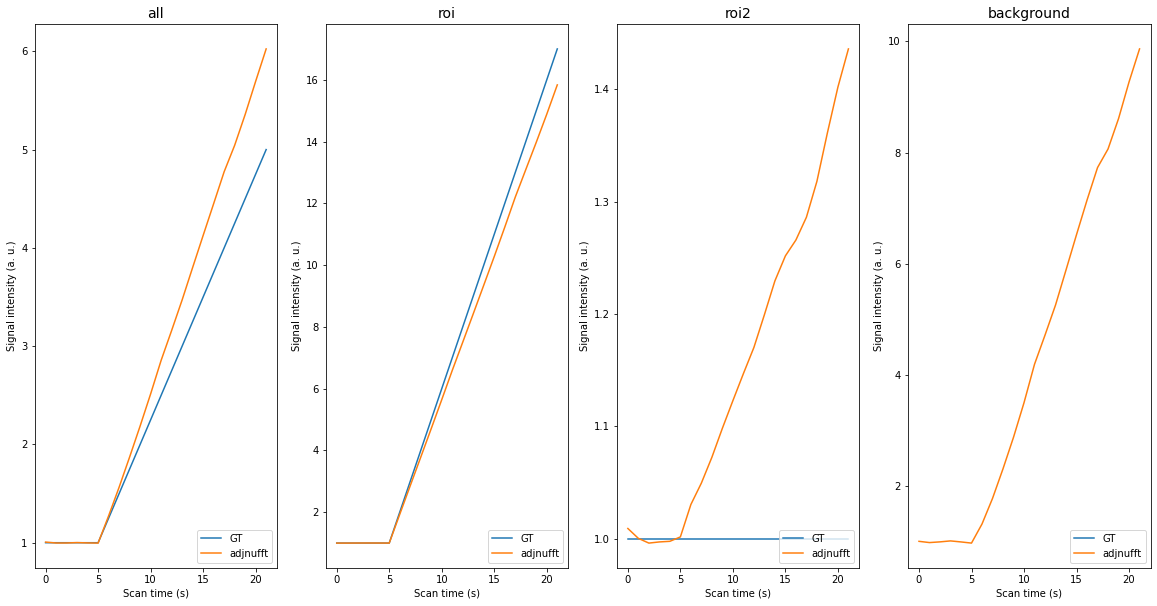

In [52]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp.to(device), 
            w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 64,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

0 alpha:  tensor([ 1.2297e-01, -2.5023e-09], device='cuda:0')
1 alpha:  tensor([ 3.5932e-01, -5.8276e-09], device='cuda:0')
2 alpha:  tensor([ 6.4819e-01, -3.1833e-08], device='cuda:0')
3 alpha:  tensor([ 8.3620e-01, -1.6877e-08], device='cuda:0')
4 alpha:  tensor([ 1.3689e-01, -2.9082e-09], device='cuda:0')
5 alpha:  tensor([ 8.7140e-01, -2.5586e-08], device='cuda:0')
6 alpha:  tensor([ 6.8816e-01, -2.5484e-08], device='cuda:0')
7 alpha:  tensor([ 6.7225e-01, -2.2684e-08], device='cuda:0')
8 alpha:  tensor([ 1.6883e-01, -3.0202e-09], device='cuda:0')
9 alpha:  tensor([ 7.0617e-01, -2.0975e-08], device='cuda:0')
10 alpha:  tensor([ 6.3775e-01, -1.0991e-08], device='cuda:0')
11 alpha:  tensor([ 1.1357e+00, -2.6303e-08], device='cuda:0')
12 alpha:  tensor([ 3.5308e-01, -7.3402e-09], device='cuda:0')
13 alpha:  tensor([ 4.6484e-01, -1.2252e-08], device='cuda:0')
14 alpha:  tensor([ 8.2220e-01, -1.2378e-08], device='cuda:0')
15 alpha:  tensor([ 1.3607e+00, -3.7659e-08], device='cuda:0')
16

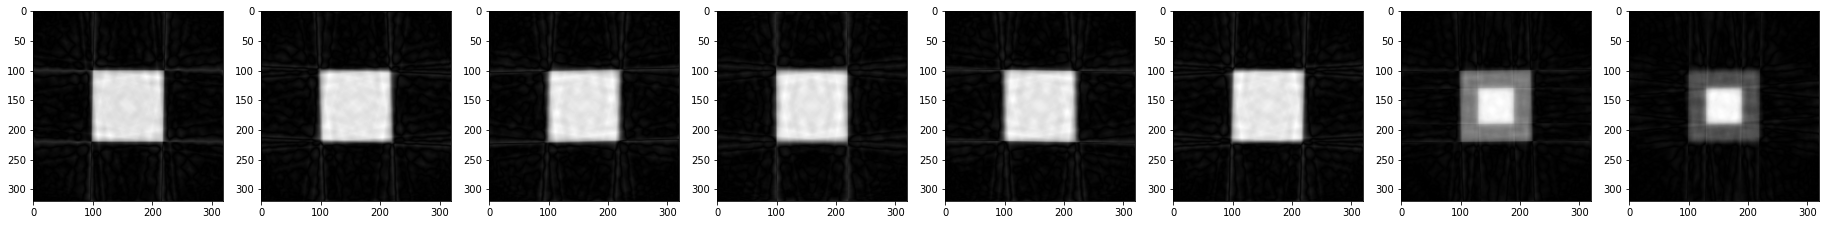

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


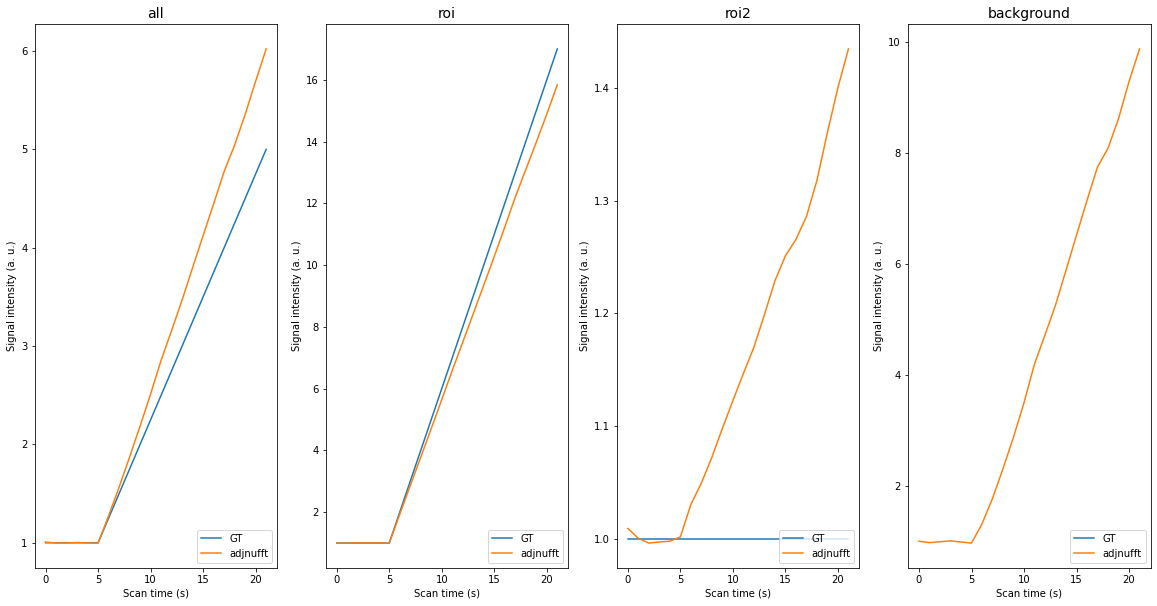

In [53]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp.to(device), 
            w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 128,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

0 alpha:  tensor([ 1.2297e-01, -2.5922e-09], device='cuda:0')
1 alpha:  tensor([ 3.5932e-01, -5.6013e-09], device='cuda:0')
2 alpha:  tensor([ 6.4819e-01, -3.1925e-08], device='cuda:0')
3 alpha:  tensor([ 8.3621e-01, -1.6002e-08], device='cuda:0')
4 alpha:  tensor([ 1.3689e-01, -3.1411e-09], device='cuda:0')
5 alpha:  tensor([ 8.7139e-01, -2.5734e-08], device='cuda:0')
6 alpha:  tensor([ 6.8817e-01, -2.6527e-08], device='cuda:0')
7 alpha:  tensor([ 6.7225e-01, -2.2238e-08], device='cuda:0')
8 alpha:  tensor([ 1.6883e-01, -3.5872e-09], device='cuda:0')
9 alpha:  tensor([ 7.0616e-01, -1.9833e-08], device='cuda:0')
10 alpha:  tensor([ 6.3775e-01, -1.5276e-08], device='cuda:0')
11 alpha:  tensor([ 1.1357e+00, -2.5651e-08], device='cuda:0')
12 alpha:  tensor([ 3.5307e-01, -7.2351e-09], device='cuda:0')
13 alpha:  tensor([ 4.6483e-01, -1.1562e-08], device='cuda:0')
14 alpha:  tensor([ 8.2168e-01, -1.3813e-08], device='cuda:0')
15 alpha:  tensor([ 1.3536e+00, -3.7658e-08], device='cuda:0')
16

130 alpha:  tensor([ 5.0314e-01, -1.4489e-08], device='cuda:0')
131 alpha:  tensor([ 7.8522e-01, -1.8725e-08], device='cuda:0')
132 alpha:  tensor([ 1.5013e+00, -2.8292e-08], device='cuda:0')
133 alpha:  tensor([ 9.9756e-01, -3.4726e-08], device='cuda:0')
134 alpha:  tensor([ 1.9173e-01, -1.3987e-08], device='cuda:0')
135 alpha:  tensor([ 8.6267e-01, -1.4457e-08], device='cuda:0')
136 alpha:  tensor([ 1.1017e+00, -2.9316e-08], device='cuda:0')
137 alpha:  tensor([ 5.9644e-01, -8.4874e-09], device='cuda:0')
138 alpha:  tensor([ 1.2436e+00, -2.7752e-08], device='cuda:0')
139 alpha:  tensor([ 1.9237e-01, -6.2215e-09], device='cuda:0')
140 alpha:  tensor([ 7.4472e-01, -2.1137e-08], device='cuda:0')
141 alpha:  tensor([ 1.2295e+00, -3.3584e-08], device='cuda:0')
142 alpha:  tensor([ 1.2921e+00, -3.2268e-08], device='cuda:0')
143 alpha:  tensor([ 3.6669e-01, -9.0237e-09], device='cuda:0')
144 alpha:  tensor([ 3.4779e-01, -8.3742e-09], device='cuda:0')
145 alpha:  tensor([ 6.5610e-01, -1.7057

259 alpha:  tensor([ 1.1971e+00, -3.6293e-08], device='cuda:0')
260 alpha:  tensor([ 6.0348e-01, -1.7071e-08], device='cuda:0')
261 alpha:  tensor([ 2.8023e-01, -2.9829e-09], device='cuda:0')
262 alpha:  tensor([ 4.7906e-01, -1.2842e-08], device='cuda:0')
263 alpha:  tensor([ 1.5777e+00, -4.2607e-08], device='cuda:0')
264 alpha:  tensor([ 1.1678e+00, -3.1367e-08], device='cuda:0')
265 alpha:  tensor([ 6.7064e-01, -1.6270e-08], device='cuda:0')
266 alpha:  tensor([ 2.4616e-01, -2.0321e-09], device='cuda:0')
267 alpha:  tensor([ 7.6104e-01, -2.0356e-08], device='cuda:0')
268 alpha:  tensor([ 8.0111e-01, -2.1150e-08], device='cuda:0')
269 alpha:  tensor([ 1.0054e+00, -2.4986e-08], device='cuda:0')
270 alpha:  tensor([ 1.0097e+00, -2.9366e-08], device='cuda:0')
271 alpha:  tensor([ 2.1904e-01, -1.2992e-09], device='cuda:0')
272 alpha:  tensor([ 9.7824e-01, -2.5214e-08], device='cuda:0')
273 alpha:  tensor([ 1.3154e+00, -3.2989e-08], device='cuda:0')
274 alpha:  tensor([ 8.1324e-01, -4.2169

388 alpha:  tensor([ 2.4065e-01, -1.3634e-08], device='cuda:0')
389 alpha:  tensor([ 1.0093e+00, -6.1007e-09], device='cuda:0')
390 alpha:  tensor([ 6.3118e-01, -2.4444e-08], device='cuda:0')
391 alpha:  tensor([ 1.2957e+00, -4.0296e-08], device='cuda:0')
392 alpha:  tensor([4.9787e-01, 3.0143e-09], device='cuda:0')
393 alpha:  tensor([ 3.5418e-01, -1.3463e-08], device='cuda:0')
394 alpha:  tensor([ 1.2184e+00, -3.4724e-08], device='cuda:0')
395 alpha:  tensor([ 1.2208e+00, -2.2901e-08], device='cuda:0')
396 alpha:  tensor([ 7.1597e-01, -3.0543e-08], device='cuda:0')
397 alpha:  tensor([ 4.4483e-01, -2.7712e-08], device='cuda:0')
398 alpha:  tensor([2.7748e-01, 9.4156e-10], device='cuda:0')
399 alpha:  tensor([ 1.1543e+00, -3.1805e-08], device='cuda:0')
400 alpha:  tensor([ 1.4452e+00, -2.4104e-08], device='cuda:0')
401 alpha:  tensor([ 8.9944e-01, -1.9270e-08], device='cuda:0')
402 alpha:  tensor([ 2.1340e-01, -9.9267e-09], device='cuda:0')
403 alpha:  tensor([ 6.9245e-01, -1.2488e-08

517 alpha:  tensor([1.3167e+00, 1.5364e-08], device='cuda:0')
518 alpha:  tensor([ 1.1926e+00, -4.7118e-08], device='cuda:0')
519 alpha:  tensor([ 2.2360e-01, -2.2529e-08], device='cuda:0')
520 alpha:  tensor([7.1200e-01, 1.2934e-08], device='cuda:0')
521 alpha:  tensor([ 7.2199e-01, -3.6971e-08], device='cuda:0')
522 alpha:  tensor([0.8896, -0.0000], device='cuda:0')
523 alpha:  tensor([ 1.2419e+00, -2.3636e-08], device='cuda:0')
524 alpha:  tensor([ 3.8991e-01, -6.3729e-09], device='cuda:0')
525 alpha:  tensor([ 3.7031e-01, -1.4917e-08], device='cuda:0')
526 alpha:  tensor([ 1.1963e+00, -1.1489e-08], device='cuda:0')
527 alpha:  tensor([ 1.3344e+00, -9.5429e-09], device='cuda:0')
528 alpha:  tensor([ 7.6686e-01, -5.2240e-08], device='cuda:0')
529 alpha:  tensor([3.2528e-01, 1.8152e-08], device='cuda:0')
530 alpha:  tensor([ 3.4420e-01, -2.7202e-08], device='cuda:0')
531 alpha:  tensor([ 1.3272e+00, -6.2804e-08], device='cuda:0')
532 alpha:  tensor([1.0575e+00, 1.1546e-08], device='cu

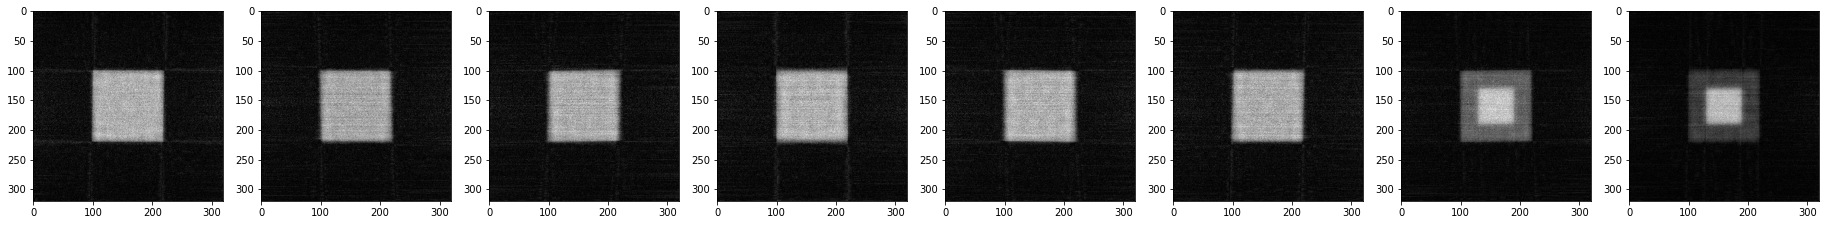

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


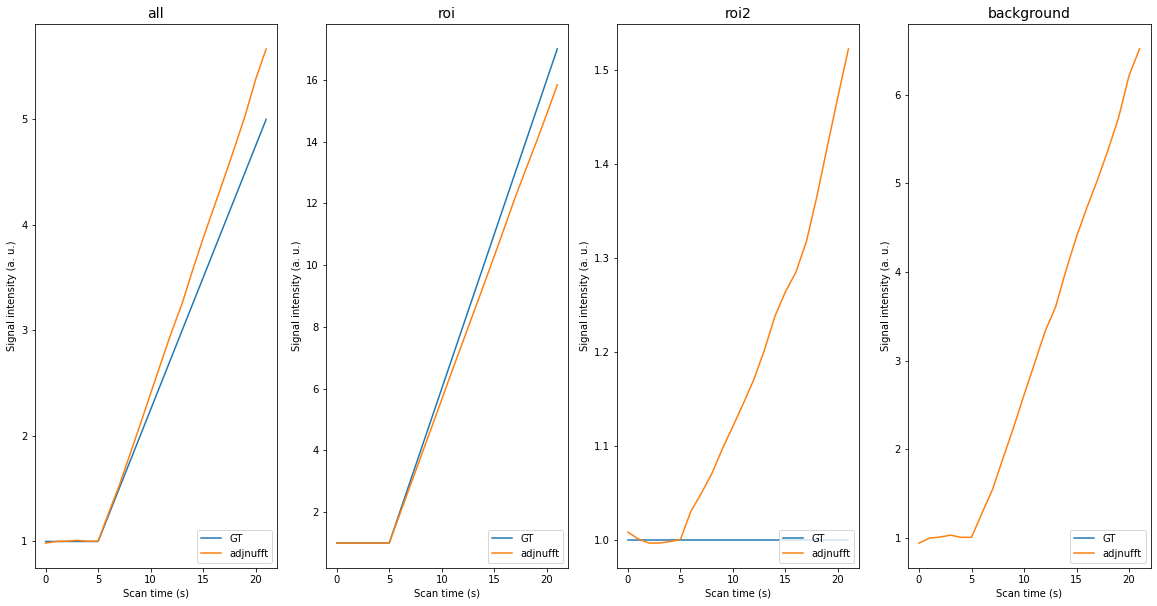

In [54]:
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon, nufft_recon = \
RadialRecon_alternative(kspace= kspace.to(device), 
            traj = traj.to(device), 
            coil_sensitivities= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y), dtype = torch.float32).to(device), 
            #w = dcomp.to(device), 
            w = dcomp_trivial.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 640,
            optimizer = 'CG5')

CG_recon_complex = CG_recon[:,0] + 1j * CG_recon[:,0]

plotcoil(np.abs(CG_recon_complex))
plotcurves(x_hat = np.abs(CG_recon_complex), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

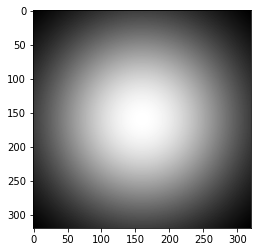

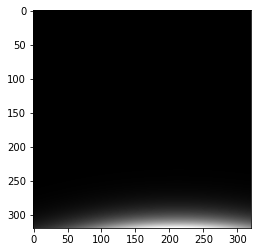

-2.1666263350903803 0.5852450110323044
-2.307633397608306 -0.6800205123358998
-1.9729428405134692 1.284075612771887
-2.147789983520493 2.654438594141748
-1.232919359119499 -0.39528054901258614
2.1869588295118234 1.9373789215448607
1.116480326228781 -0.08323112485672368
-1.5004678741187274 -1.1595858217513904
0.259321803454029 1.5176825200989104
-1.1331165055140386 -1.2264173941571068
-2.137693436842224 -2.2440827568984716
-0.677511908060147 -1.6649576585117563
-0.4979340346636434 -2.666153363961125
-2.224936192135482 -0.9390134589500416
-2.148855791761312 1.853997250776402
0.9231700725871823 0.1472773180762168


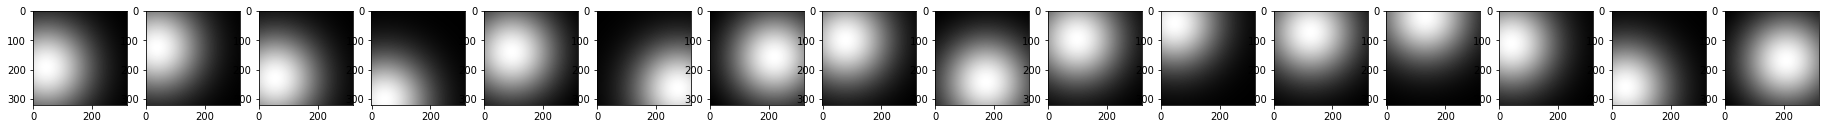

(16, 320, 320) complex128 torch.Size([22, 2, 320, 320])


In [71]:
def coil_smap_sim(h, w, x0 = 0, y0 = 0):
    #https://www.geeksforgeeks.org/how-to-generate-2-d-gaussian-array-using-numpy/
    # Initializing value of x-axis and y-axis
    # in the range -2 to +2
    x, y = np.meshgrid(np.linspace(-3, 3, h), np.linspace(-3, 3, w))
    dst = np.sqrt(x**2 + y**2)

    # Intializing sigma and muu
    sigma_x, sigma_y = 2.0, 2.0 * h / w

    # Calculating Gaussian array
    gauss = np.exp(-( (x - x0)**2 / ( 2.0 * sigma_x**2 ) \
                    + (y - y0)**2 / ( 2.0 * sigma_y**2 ) ) )
    
    return gauss

def multi_coil_smap_sim(h, w, ncoil = 16):
    res = []
    for i in range(ncoil):
        x0, y0 = np.random.uniform(-3, 3, size = 2)
        print(x0, y0)
        res.append(coil_smap_sim(h, w, x0, y0))
        
    return np.array(res)

gauss = coil_smap_sim(320, 320)

plt.imshow(gauss)
plt.show()

gauss = coil_smap_sim(320, 320, 1, 16)

plt.imshow(gauss)
plt.show()

smap = multi_coil_smap_sim(320, 320, ncoil = 16)

plotcoil(x = smap, n = 16)

smap = smap + 1j * smap
print(smap.shape, smap.dtype, pt.shape)

smap_tensor = numpy2torch(smap).permute(1, 0, 2, 3).unsqueeze(0).to(torch.float32).to(device)

/home/zh1115/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


torch.Size([22, 1, 2, 13440])
torch.Size([22, 16, 2, 13440])
torch.Size([22, 2, 320, 320])


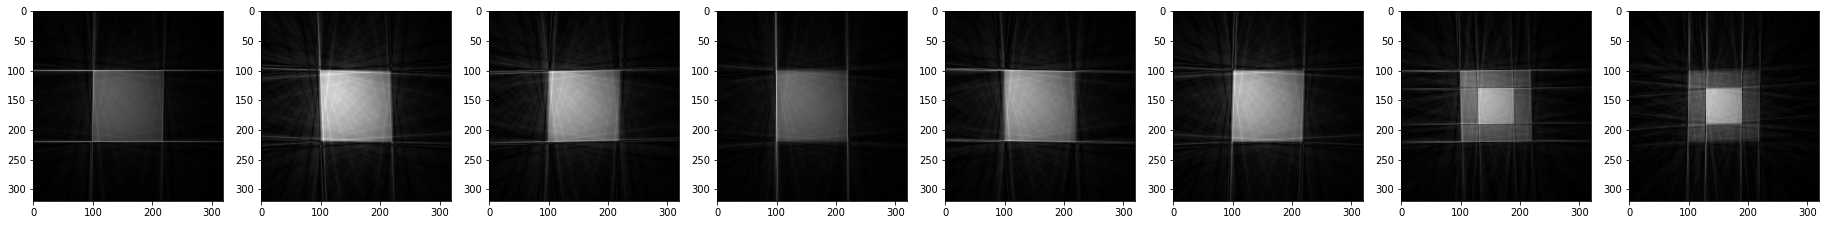

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


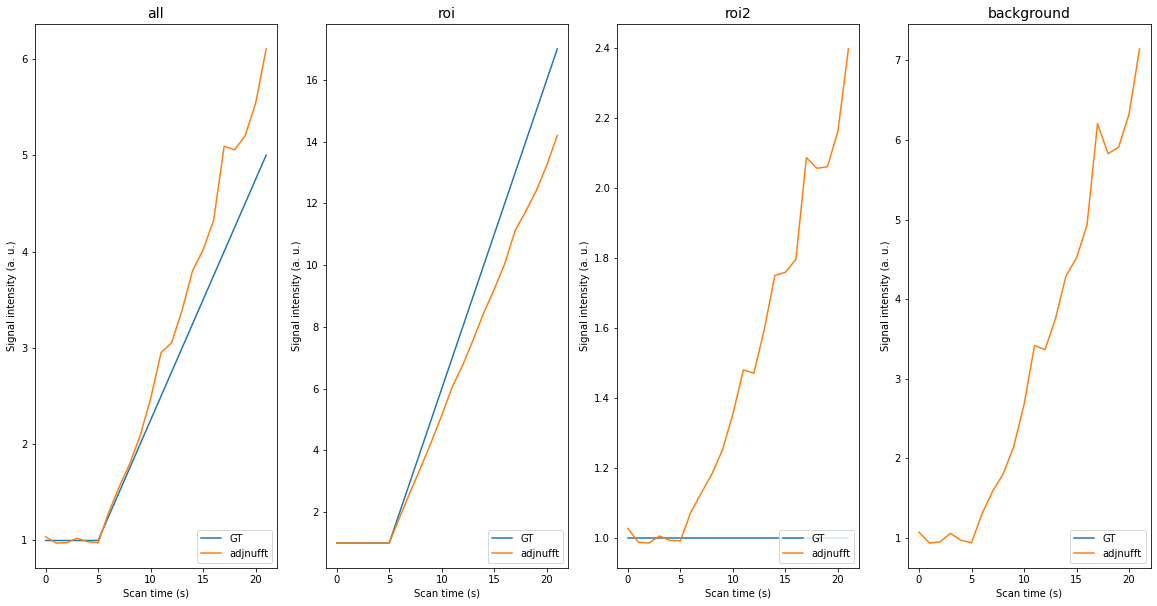

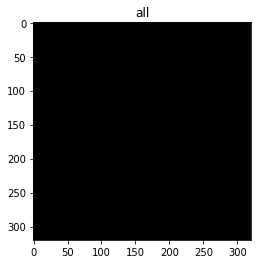

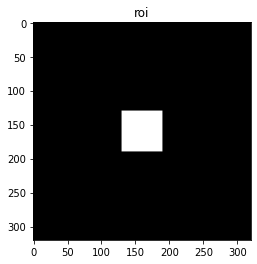

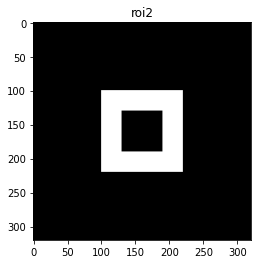

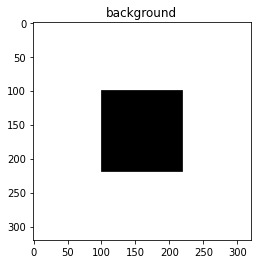

In [72]:
kspace_mc, recon_mc, traj_mc, dcomp_mc = RadialSimulation(target= torch.tensor(pt, dtype = torch.float32).to(device), 
                                                 spokespertime= 21, nt= 22, nc = 1, spokelength= 640, 
                                                 #smap= (2 ** (-0.5)) * torch.ones((1, 1, 2, x, y) , dtype = torch.float32).to(device),
                                                 smap = smap_tensor,
                                                 grid_size= (640, 640), im_size= (320, 320))

plotcoil(torch.sqrt(recon_mc[:, 0]**2 + recon_mc[:, 1]**2).cpu(), n = 8)

plotcurves(x_hat = recon_mc.cpu(). numpy(), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

for k, v in maskdict.items():
    #plt.imshow(v, vmin = 0, vmax = 1)
    plt.imshow(v)
    plt.title(k)
    plt.show()

In [68]:
numpy2torch(smap).permute(1, 0, 2, 3).unsqueeze(0).shape

torch.Size([1, 16, 2, 320, 320])

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(0.0153, device='cuda:0')
0 Residual l2 norm =2477778176.000000


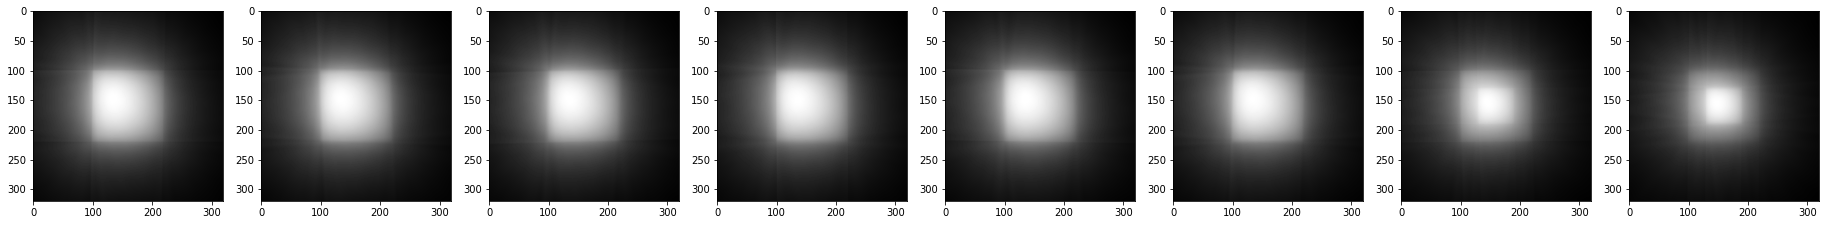

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


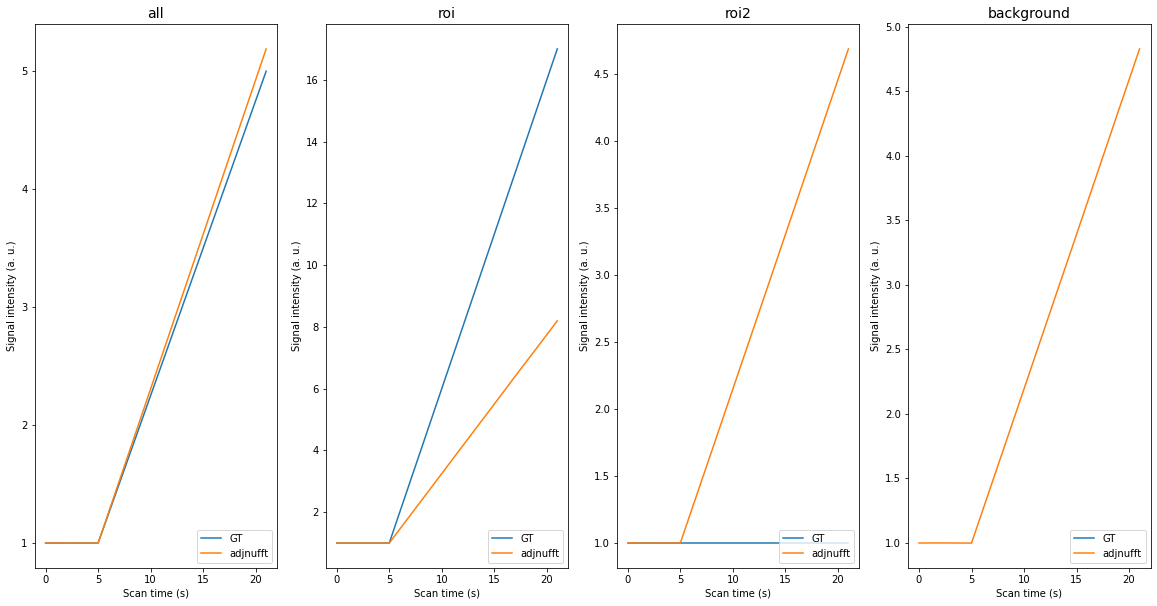

In [76]:
# CG2, no dcomp, 1 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            w = dcomp_trivial.to(device), 
            #w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 1,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(0.0153, device='cuda:0')
0 Residual l2 norm =2477778176.000000
1 tensor(0.0234, device='cuda:0')
1 Residual l2 norm =1127928832.000000
2 tensor(0.0171, device='cuda:0')
2 Residual l2 norm =348969536.000000
3 tensor(0.0250, device='cuda:0')
3 Residual l2 norm =240205568.000000
4 tensor(0.0176, device='cuda:0')
4 Residual l2 norm =87571912.000000
5 tensor(0.0259, device='cuda:0')
5 Residual l2 norm =71436648.000000
6 tensor(0.0181, device='cuda:0')
6 Residual l2 norm =29706044.000000
7 tensor(0.0268, device='cuda:0')
7 Residual l2 norm =27895872.000000
8 tensor(0.0184, device='cuda:0')
8 Residual l2 norm =12838407.000000
9 tensor(0.0275, device='cuda:0')
9 Residual l2 norm =13358673.000000
10 tensor(0.0187, device='cuda:0')
10 Residual l2 norm =6583216.000000
11 tensor(0.0279, device='cuda:0')
11 Residual l2 norm =7324768.500000
12 tensor(0.0189, device='cuda:0')
12 Residual l2 norm =3769328.750000
13 tensor(0.0282, devic

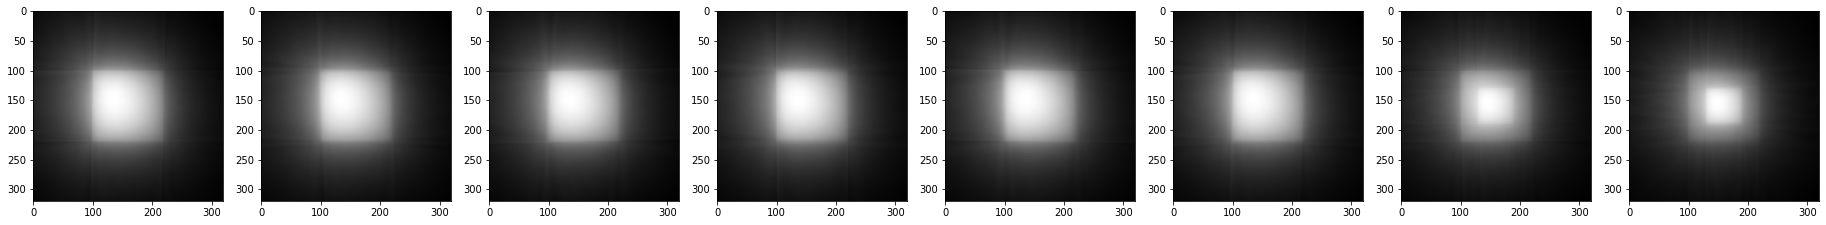

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


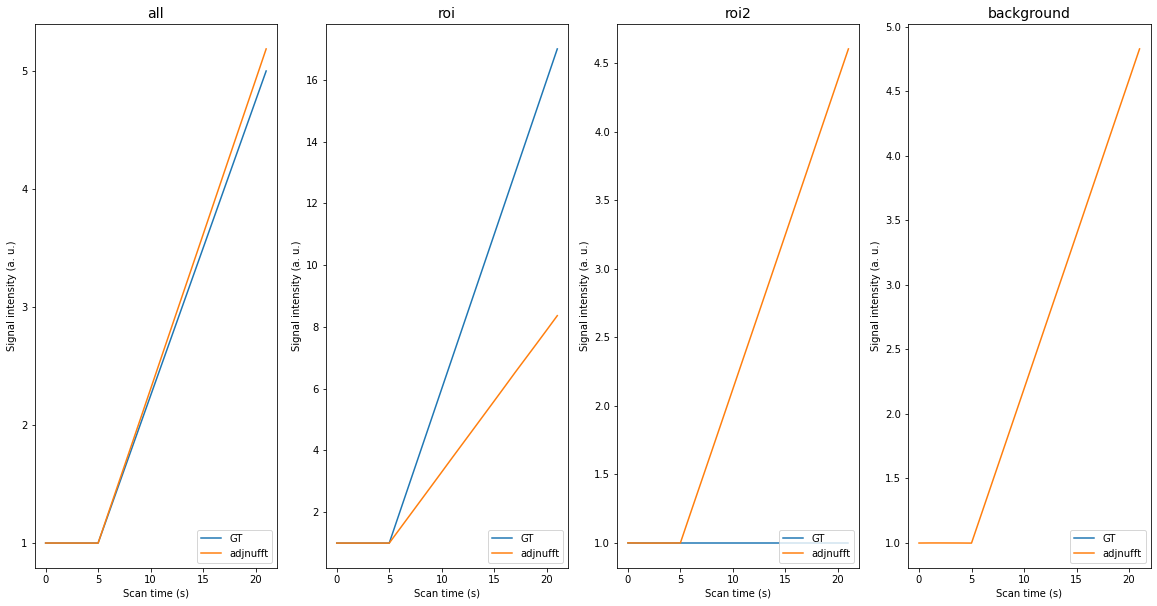

In [77]:
# CG2, no dcomp, 32 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            w = dcomp_trivial.to(device), 
            #w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(1.8580, device='cuda:0')
0 Residual l2 norm =2161143.000000


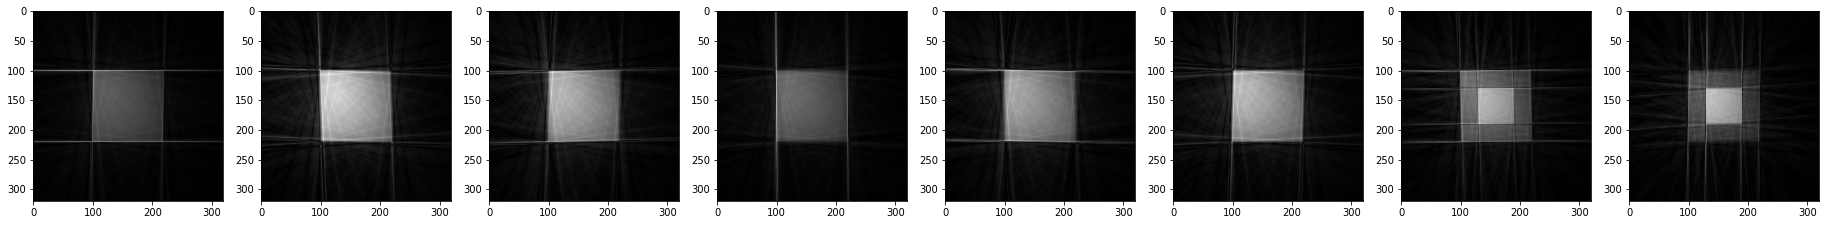

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


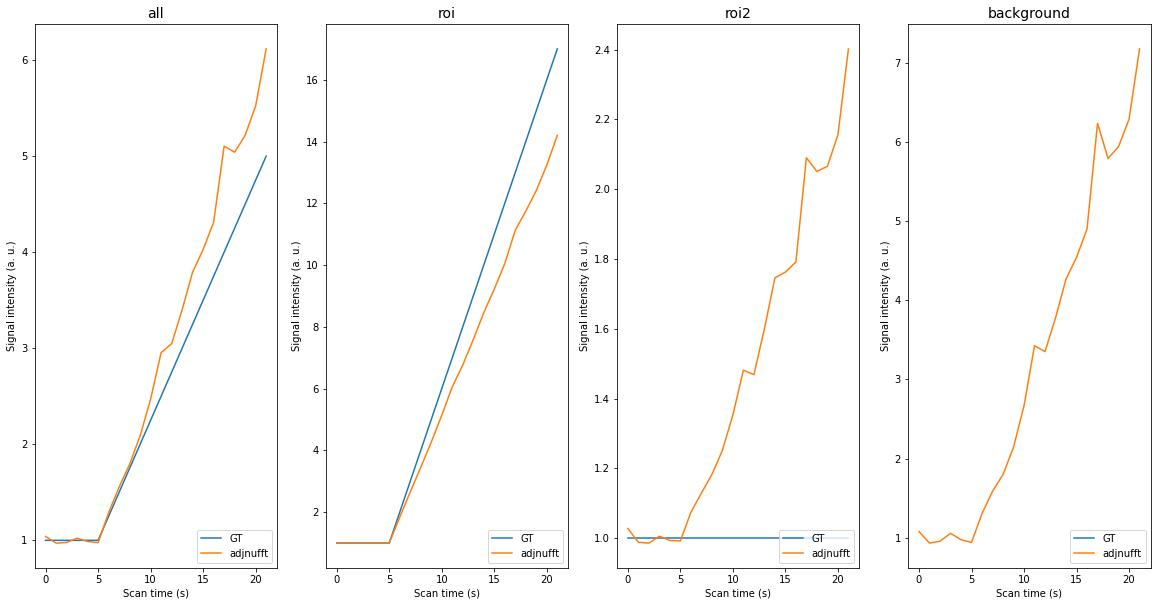

In [79]:
# CG2, with dcomp, 1 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 1,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(1.8580, device='cuda:0')
0 Residual l2 norm =2161143.000000
1 tensor(0.3355, device='cuda:0')
1 Residual l2 norm =333547.687500
2 tensor(0.5475, device='cuda:0')
2 Residual l2 norm =310426.750000
3 tensor(0.3668, device='cuda:0')
3 Residual l2 norm =164276.296875
4 tensor(0.4784, device='cuda:0')
4 Residual l2 norm =179280.406250
5 tensor(0.3253, device='cuda:0')
5 Residual l2 norm =104149.601562
6 tensor(0.4095, device='cuda:0')
6 Residual l2 norm =110859.609375
7 tensor(0.3079, device='cuda:0')
7 Residual l2 norm =69026.625000
8 tensor(0.3957, device='cuda:0')
8 Residual l2 norm =72971.078125
9 tensor(0.3074, device='cuda:0')
9 Residual l2 norm =46514.859375
10 tensor(0.3924, device='cuda:0')
10 Residual l2 norm =48777.375000
11 tensor(0.3090, device='cuda:0')
11 Residual l2 norm =31568.830078
12 tensor(0.3903, device='cuda:0')
12 Residual l2 norm =32826.460938
13 tensor(0.3110, device='cuda:0')
13 Residual l2 norm =2

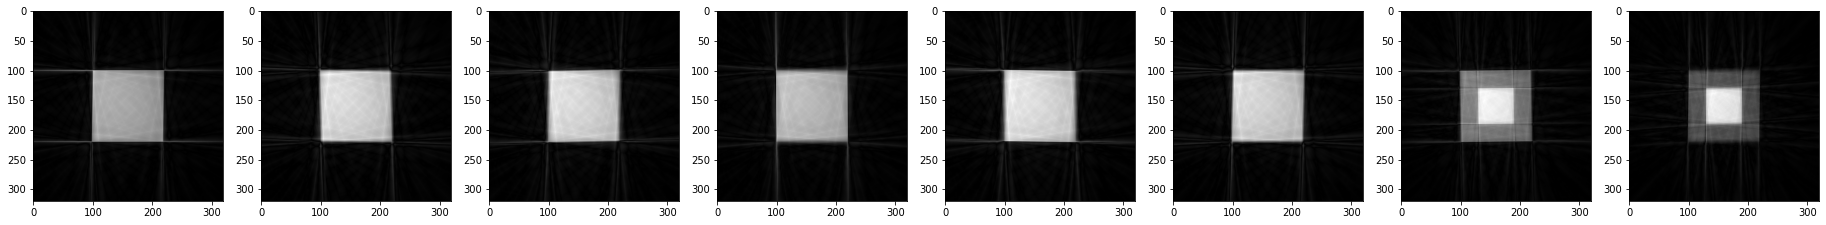

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


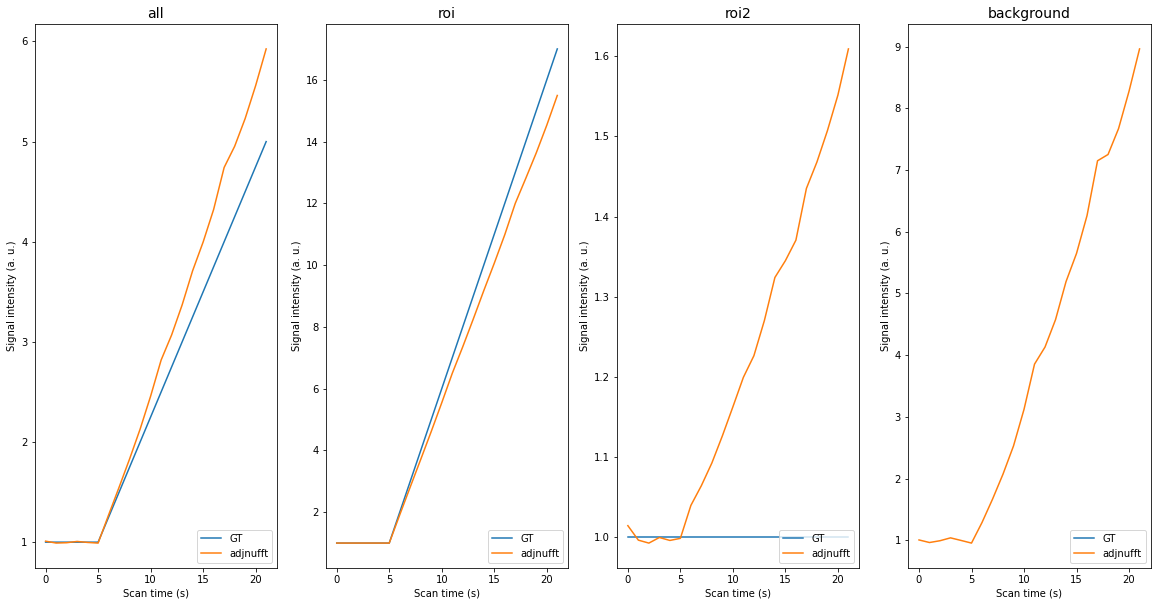

In [78]:
# CG2, with dcomp, 32 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 32,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(1.8580, device='cuda:0')
0 Residual l2 norm =2161143.000000
1 tensor(0.3355, device='cuda:0')
1 Residual l2 norm =333547.687500
2 tensor(0.5475, device='cuda:0')
2 Residual l2 norm =310426.750000
3 tensor(0.3668, device='cuda:0')
3 Residual l2 norm =164276.250000
4 tensor(0.4784, device='cuda:0')
4 Residual l2 norm =179280.468750
5 tensor(0.3253, device='cuda:0')
5 Residual l2 norm =104149.554688
6 tensor(0.4095, device='cuda:0')
6 Residual l2 norm =110859.656250
7 tensor(0.3079, device='cuda:0')
7 Residual l2 norm =69026.625000
8 tensor(0.3957, device='cuda:0')
8 Residual l2 norm =72971.031250
9 tensor(0.3074, device='cuda:0')
9 Residual l2 norm =46514.898438
10 tensor(0.3924, device='cuda:0')
10 Residual l2 norm =48777.328125
11 tensor(0.3090, device='cuda:0')
11 Residual l2 norm =31568.845703
12 tensor(0.3903, device='cuda:0')
12 Residual l2 norm =32826.421875
13 tensor(0.3110, device='cuda:0')
13 Residual l2 norm =2

122 tensor(0.4497, device='cuda:0')
122 Residual l2 norm =15.034284
123 tensor(0.4506, device='cuda:0')
123 Residual l2 norm =14.773102
124 tensor(0.4514, device='cuda:0')
124 Residual l2 norm =14.518742
125 tensor(0.4522, device='cuda:0')
125 Residual l2 norm =14.270959
126 tensor(0.4531, device='cuda:0')
126 Residual l2 norm =14.029535
127 tensor(0.4539, device='cuda:0')
127 Residual l2 norm =13.794202


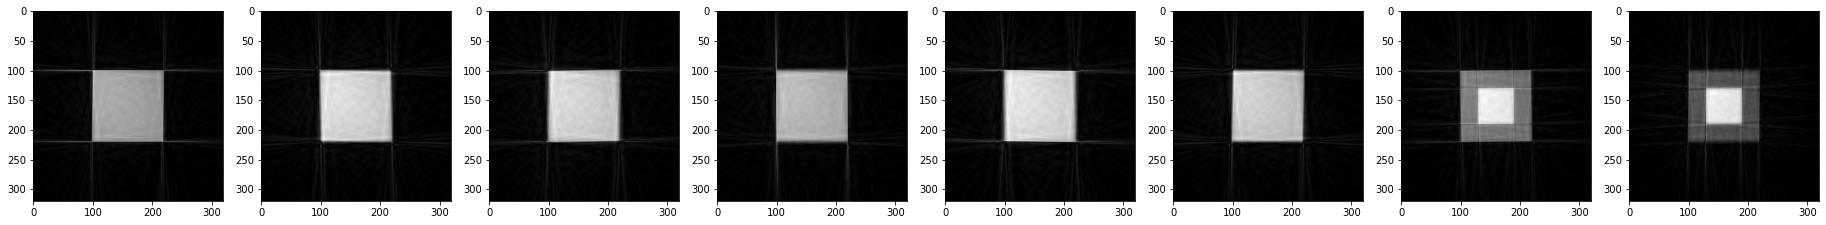

(22,)


../radialmri/simulation_and_reconstruction.py:226: RuntimeWarning: invalid value encountered in true_divide
  return curve/m;


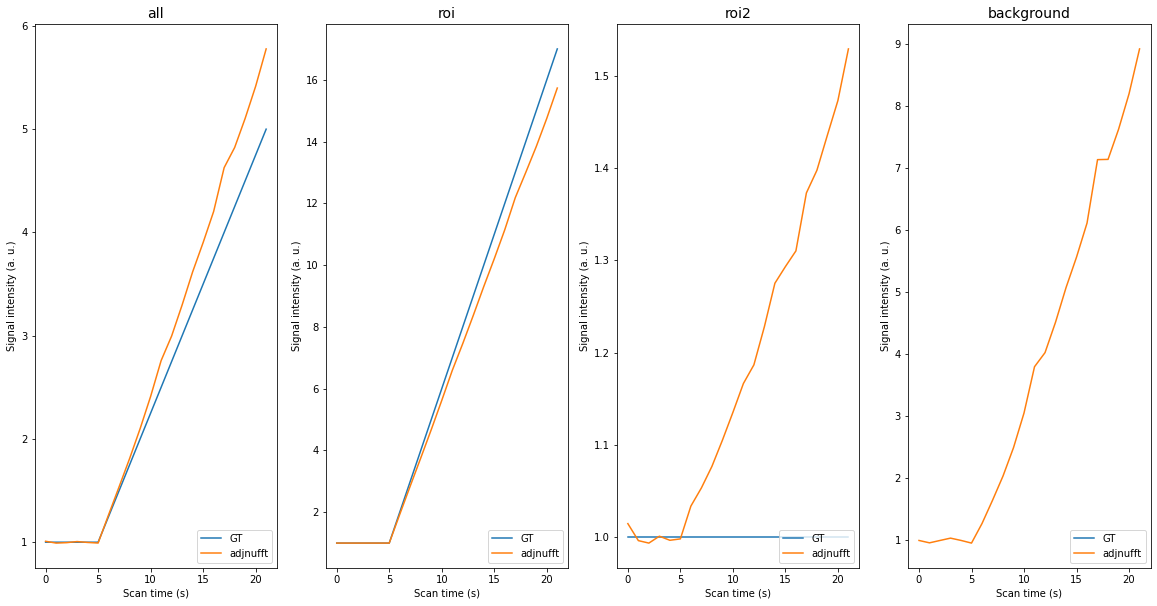

In [80]:
# CG2, with dcomp, 128 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 128,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

In [ ]:
# CG2, with dcomp, 640 iterations
dcomp_trivial = torch.ones(dcomp.shape).to(device)

CG_recon_mc, nufft_recon_mc = \
RadialRecon_alternative(kspace= kspace_mc.to(device), 
            traj = traj_mc.to(device), 
            coil_sensitivities= smap_tensor, 
            #w = dcomp_trivial.to(device), 
            w = dcomp.to(device), 
            grid_size = (640, 640),
            im_size = (320, 320), 
            tolerance = 1e-10,
            lambda1 = None,
            niter = 640,
            optimizer = 'CG2')

CG_recon_complex_mc = CG_recon_mc[:,0] + 1j * CG_recon_mc[:,0]

plotcoil(np.abs(CG_recon_complex_mc))

plotcurves(x_hat = np.abs(CG_recon_complex_mc), 
           x_gt = pt.cpu(). numpy(), 
           maskdict = maskdict,
           names = ['adjnufft', 'GT'], 
           normalize = True)

coil_sensitivities.shape torch.Size([1, 16, 2, 320, 320])
0 tensor(1.8580, device='cuda:0')
0 Residual l2 norm =2161143.000000
1 tensor(0.3355, device='cuda:0')
1 Residual l2 norm =333547.687500
2 tensor(0.5475, device='cuda:0')
2 Residual l2 norm =310426.812500
3 tensor(0.3668, device='cuda:0')
3 Residual l2 norm =164276.250000
4 tensor(0.4784, device='cuda:0')
4 Residual l2 norm =179280.468750
5 tensor(0.3253, device='cuda:0')
5 Residual l2 norm =104149.554688
6 tensor(0.4095, device='cuda:0')
6 Residual l2 norm =110859.671875
7 tensor(0.3079, device='cuda:0')
7 Residual l2 norm =69026.640625
8 tensor(0.3957, device='cuda:0')
8 Residual l2 norm =72971.046875
9 tensor(0.3074, device='cuda:0')
9 Residual l2 norm =46514.910156
10 tensor(0.3924, device='cuda:0')
10 Residual l2 norm =48777.320312
11 tensor(0.3090, device='cuda:0')
11 Residual l2 norm =31568.857422
12 tensor(0.3903, device='cuda:0')
12 Residual l2 norm =32826.421875
13 tensor(0.3110, device='cuda:0')
13 Residual l2 norm =2

122 tensor(0.4497, device='cuda:0')
122 Residual l2 norm =15.034273
123 tensor(0.4506, device='cuda:0')
123 Residual l2 norm =14.773108
124 tensor(0.4514, device='cuda:0')
124 Residual l2 norm =14.518750
125 tensor(0.4522, device='cuda:0')
125 Residual l2 norm =14.270965
126 tensor(0.4530, device='cuda:0')
126 Residual l2 norm =14.029529
127 tensor(0.4539, device='cuda:0')
127 Residual l2 norm =13.794207
128 tensor(0.4547, device='cuda:0')
128 Residual l2 norm =13.564806
129 tensor(0.4555, device='cuda:0')
129 Residual l2 norm =13.341109
130 tensor(0.4564, device='cuda:0')
130 Residual l2 norm =13.122941
131 tensor(0.4572, device='cuda:0')
131 Residual l2 norm =12.910082
132 tensor(0.4580, device='cuda:0')
132 Residual l2 norm =12.702394
133 tensor(0.4589, device='cuda:0')
133 Residual l2 norm =12.499671
134 tensor(0.4597, device='cuda:0')
134 Residual l2 norm =12.301785
135 tensor(0.4605, device='cuda:0')
135 Residual l2 norm =12.108550
136 tensor(0.4613, device='cuda:0')
136 Residual

244 tensor(0.5534, device='cuda:0')
244 Residual l2 norm =3.377218
245 tensor(0.5544, device='cuda:0')
245 Residual l2 norm =3.346108
246 tensor(0.5553, device='cuda:0')
246 Residual l2 norm =3.315373
247 tensor(0.5562, device='cuda:0')
247 Residual l2 norm =3.285002
248 tensor(0.5571, device='cuda:0')
248 Residual l2 norm =3.254989
249 tensor(0.5580, device='cuda:0')
249 Residual l2 norm =3.225336
250 tensor(0.5589, device='cuda:0')
250 Residual l2 norm =3.196036
251 tensor(0.5598, device='cuda:0')
251 Residual l2 norm =3.167074
252 tensor(0.5608, device='cuda:0')
252 Residual l2 norm =3.138452
253 tensor(0.5617, device='cuda:0')
253 Residual l2 norm =3.110167
254 tensor(0.5626, device='cuda:0')
254 Residual l2 norm =3.082206
255 tensor(0.5635, device='cuda:0')
255 Residual l2 norm =3.054575
256 tensor(0.5645, device='cuda:0')
256 Residual l2 norm =3.027256
257 tensor(0.5654, device='cuda:0')
257 Residual l2 norm =3.000257
258 tensor(0.5663, device='cuda:0')
258 Residual l2 norm =2.97